<a href="https://colab.research.google.com/github/adamgrzanek/predicting_car_data/blob/main/otomoto_cars_EDA_%26_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The main goal is to predict the car's power based on selected car data.

Linear regression and decision tree were used.

### Contents:
1. [Import libraries](#1)
2. [Loading data and creating a data frame](#2)
3. [Data frame splitting and preprocessing](#3)
4. [EDA (traning data)](#4)
5. [Model](#5)

### <a name='1'></a> Import libraries

In [172]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [173]:
pd.set_option('display.max_columns', None)

# <a name='2'></a> Loading data and creating a data frame

In [174]:
files = !ls *.csv -l
files

['-rw-r--r-- 1 root root 3396859 Oct 10 10:45 coupe.csv',
 '-rw-r--r-- 1 root root 1887500 Oct 10 10:45 kabrio.csv',
 '-rw-r--r-- 1 root root 6130024 Oct 10 10:46 kombi.csv',
 '-rw-r--r-- 1 root root 5871247 Oct 10 10:45 kompakt.csv',
 '-rw-r--r-- 1 root root 3790778 Oct 10 10:45 male.csv',
 '-rw-r--r-- 1 root root 4237532 Oct 10 10:45 miejskie.csv',
 '-rw-r--r-- 1 root root 5577297 Oct 10 10:45 minivan.csv',
 '-rw-r--r-- 1 root root 4623226 Oct 10 10:45 sedan.csv',
 '-rw-r--r-- 1 root root 5546067 Oct 10 10:45 suv.csv']

In [175]:
files = [f.split()[-1] for f in files]
files

['coupe.csv',
 'kabrio.csv',
 'kombi.csv',
 'kompakt.csv',
 'male.csv',
 'miejskie.csv',
 'minivan.csv',
 'sedan.csv',
 'suv.csv']

In [176]:
all_data_dict = {}
len_df = 0

for car_type in files:
    all_data_dict[car_type] = pd.read_csv(car_type, engine='python')
    print(f'{car_type}, len {car_type} df: {len(all_data_dict[car_type])}')
    len_df += len(all_data_dict[car_type])
    print(40 * '-')

print(f'\nTotal number of rows: {len_df}')

coupe.csv, len coupe.csv df: 1730
----------------------------------------
kabrio.csv, len kabrio.csv df: 1150
----------------------------------------
kombi.csv, len kombi.csv df: 3170
----------------------------------------
kompakt.csv, len kompakt.csv df: 3186
----------------------------------------
male.csv, len male.csv df: 2732
----------------------------------------
miejskie.csv, len miejskie.csv df: 2450
----------------------------------------
minivan.csv, len minivan.csv df: 3082
----------------------------------------
sedan.csv, len sedan.csv df: 2462
----------------------------------------
suv.csv, len suv.csv df: 2732
----------------------------------------

Total number of rows: 22694


In [177]:
df = pd.concat([df for df in all_data_dict.values()], axis=0, join='outer', ignore_index=True)
df.head()

,Unnamed: 0,Oferta od,Pokaż oferty z numerem VIN,Ma numer rejestracyjny,Marka pojazdu,Model pojazdu,Wersja,Rok produkcji,Przebieg,Pojemność skokowa,VIN,Rodzaj paliwa,Moc,Skrzynia biegów,Napęd,Spalanie W Mieście,Typ nadwozia,Liczba drzwi,Liczba miejsc,Kolor,Leasing,Kraj pochodzenia,Data pierwszej rejestracji w historii pojazdu,Zarejestrowany w Polsce,Pierwszy właściciel (od nowości),Bezwypadkowy,Serwisowany w ASO,Stan,cena,opis,Wojewodztwo_sprzedajacego,Importowany,Generacja,Spalanie Poza Miastem,Emisja CO2,Rodzaj koloru,Opłata początkowa,Miesięczna rata,Liczba pozostałych rat,Wartość wykupu,Tuning,Okres gwarancji producenta,lub do (przebieg km),Faktura VAT,VAT marża,Możliwość finansowania,Spalanie W Cyklu Mieszanym,Gwarancja dealerska (w cenie),Autonomia,Średnie zużycie,Pojemność baterii,Rodzaj własności baterii,Kierownica po prawej (Anglik),Zarejestrowany jako zabytek,Homologacja ciężarowa,Czas ładowania,Unnamed: 0.1
0,0,Prywatne,Tak,Tak,Volkswagen,Arteon,2.0 TDI SCR DSG R-Line,2019.0,179 900 km,1 968 cm3,WVWZZZ3HZKE027697,Diesel,190 KM,Automatyczna,Na przednie koła,"5,20 l/100km",Coupe,5.0,5.0,Szary,Tak,Polska,21 czerwiec 2019,Tak,Tak,Tak,Tak,Używane,108973.0,Szukasz pewnego samochodu z pełna dokumentacja...,Wielkopolskie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Prywatne,Tak,Tak,Mercedes-Benz,CL,65 AMG,2008.0,118 000 km,5 980 cm3,WDDEJ79X18A012374,Benzyna,612 KM,Automatyczna,Na tylne koła,23 l/100km,Coupe,2.0,4.0,Czarny,NaN,Stany Zjednoczone,NaN,Tak,NaN,Tak,NaN,Używane,244770.0,INFORMACJE PODSTAWOWE: MERCEDES CL 65 AMG V12...,Pomorskie,Tak,C216 (2006-2013),10.0 l/100km,355 g/km,Metalik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Prywatne,Tak,Tak,BMW,M4,Competition GPF DKG,2017.0,63 800 km,2 979 cm3,WBS4Y91040AC55849,Benzyna,450 KM,Automatyczna,Na tylne koła,NaN,Coupe,2.0,4.0,Szary,NaN,Polska,grudzień 2018,Tak,NaN,NaN,NaN,Używane,310000.0,Do sprzedania BMW M4 Performance Edition 1/40 ...,Lubelskie,NaN,NaN,NaN,227 g/km,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Prywatne,Tak,Tak,Audi,A5,NaN,2017.0,81 000 km,1 984 cm3,WAUTNAF54JA036712,Benzyna,251 KM,Automatyczna,4x4 (stały),"7,80 l/100km",Coupe,2.0,4.0,Biały,NaN,Stany Zjednoczone,NaN,Tak,NaN,NaN,NaN,Używane,115000.0,Sprzedam bardzo ładne i zadbane audi A5 coupe....,Wielkopolskie,Tak,F5 (2016-),5.5 l/100km,144 g/km,Perłowy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Prywatne,Tak,Tak,Opel,Astra,III GTC 1.6 Sport,2009.0,180 000 km,1 598 cm3,W0L0AHL0895029352,Benzyna,115 KM,Manualna,Na przednie koła,8 l/100km,Coupe,3.0,5.0,Czarny,NaN,Niemcy,15 wrzesień 2017,Tak,NaN,Tak,NaN,Używane,17500.0,Sprzedam Opla Astre H GTC w wersji po liftingu...,Małopolskie,NaN,H (2004-2014),5.0 l/100km,156 g/km,Metalik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
df.shape

(22694, 57)

In [179]:
df.duplicated().sum()

97

In [180]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [181]:
df_raw = df.copy()
df_raw.to_csv('cars_raw.csv', index=False)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22597 entries, 0 to 22693
Data columns (total 57 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     22597 non-null  object 
 1   Oferta od                                      22520 non-null  object 
 2   Pokaż oferty z numerem VIN                     22496 non-null  object 
 3   Ma numer rejestracyjny                         14576 non-null  object 
 4   Marka pojazdu                                  22506 non-null  object 
 5   Model pojazdu                                  22511 non-null  object 
 6   Wersja                                         15669 non-null  object 
 7   Rok produkcji                                  22507 non-null  object 
 8   Przebieg                                       22504 non-null  object 
 9   Pojemność skokowa                              221

### Dropping rows without basic data (cena, moc)

In [183]:
df.dropna(subset=['cena', 'Moc'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22503 entries, 0 to 22693
Data columns (total 57 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     22503 non-null  object 
 1   Oferta od                                      22503 non-null  object 
 2   Pokaż oferty z numerem VIN                     22491 non-null  object 
 3   Ma numer rejestracyjny                         14575 non-null  object 
 4   Marka pojazdu                                  22503 non-null  object 
 5   Model pojazdu                                  22503 non-null  object 
 6   Wersja                                         15662 non-null  object 
 7   Rok produkcji                                  22503 non-null  object 
 8   Przebieg                                       22503 non-null  object 
 9   Pojemność skokowa                              221

In [184]:
df.describe()

,Liczba drzwi,Liczba miejsc,Liczba pozostałych rat,Unnamed: 0.1
count,22473.000000,21677.000000,195.000000,2722.000000
mean,4.440084,4.909720,29.235897,1156.885378
std,0.992845,0.927883,14.530300,766.932816
min,2.000000,1.000000,3.000000,0.000000
25%,4.000000,5.000000,18.000000,464.250000
50%,5.000000,5.000000,31.000000,1144.500000
75%,5.000000,5.000000,38.500000,1824.750000
max,6.000000,9.000000,76.000000,2505.000000


In [185]:
df.describe(include='object').T

,count,unique,top,freq
Unnamed: 0,22503,5914,0,10
Oferta od,22503,2,Prywatne,14552
Pokaż oferty z numerem VIN,22491,1,Tak,22491
Ma numer rejestracyjny,14575,1,Tak,14575
Marka pojazdu,22503,81,Volkswagen,2021
Model pojazdu,22503,796,Astra,485
Wersja,15662,7352,Standard,155
Rok produkcji,22503.0,48.0,2018.0,1128.0
Przebieg,22503,9278,160 000 km,106
Pojemność skokowa,22155,447,1 598 cm3,1661


# <a name='3'></a> Data frame splitting and preprocessing

In [186]:
X = df.copy()
y = X.pop('Moc')

In [187]:
y

0        190 KM
1        612 KM
2        450 KM
3        251 KM
4        115 KM
          ...  
22689    150 KM
22690    231 KM
22691    115 KM
22692    150 KM
22693    210 KM
Name: Moc, Length: 22503, dtype: object

In [188]:
X

,Unnamed: 0,Oferta od,Pokaż oferty z numerem VIN,Ma numer rejestracyjny,Marka pojazdu,Model pojazdu,Wersja,Rok produkcji,Przebieg,Pojemność skokowa,VIN,Rodzaj paliwa,Skrzynia biegów,Napęd,Spalanie W Mieście,Typ nadwozia,Liczba drzwi,Liczba miejsc,Kolor,Leasing,Kraj pochodzenia,Data pierwszej rejestracji w historii pojazdu,Zarejestrowany w Polsce,Pierwszy właściciel (od nowości),Bezwypadkowy,Serwisowany w ASO,Stan,cena,opis,Wojewodztwo_sprzedajacego,Importowany,Generacja,Spalanie Poza Miastem,Emisja CO2,Rodzaj koloru,Opłata początkowa,Miesięczna rata,Liczba pozostałych rat,Wartość wykupu,Tuning,Okres gwarancji producenta,lub do (przebieg km),Faktura VAT,VAT marża,Możliwość finansowania,Spalanie W Cyklu Mieszanym,Gwarancja dealerska (w cenie),Autonomia,Średnie zużycie,Pojemność baterii,Rodzaj własności baterii,Kierownica po prawej (Anglik),Zarejestrowany jako zabytek,Homologacja ciężarowa,Czas ładowania,Unnamed: 0.1
0,0,Prywatne,Tak,Tak,Volkswagen,Arteon,2.0 TDI SCR DSG R-Line,2019.0,179 900 km,1 968 cm3,WVWZZZ3HZKE027697,Diesel,Automatyczna,Na przednie koła,"5,20 l/100km",Coupe,5.0,5.0,Szary,Tak,Polska,21 czerwiec 2019,Tak,Tak,Tak,Tak,Używane,108973.0,Szukasz pewnego samochodu z pełna dokumentacja...,Wielkopolskie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Prywatne,Tak,Tak,Mercedes-Benz,CL,65 AMG,2008.0,118 000 km,5 980 cm3,WDDEJ79X18A012374,Benzyna,Automatyczna,Na tylne koła,23 l/100km,Coupe,2.0,4.0,Czarny,NaN,Stany Zjednoczone,NaN,Tak,NaN,Tak,NaN,Używane,244770.0,INFORMACJE PODSTAWOWE: MERCEDES CL 65 AMG V12...,Pomorskie,Tak,C216 (2006-2013),10.0 l/100km,355 g/km,Metalik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Prywatne,Tak,Tak,BMW,M4,Competition GPF DKG,2017.0,63 800 km,2 979 cm3,WBS4Y91040AC55849,Benzyna,Automatyczna,Na tylne koła,NaN,Coupe,2.0,4.0,Szary,NaN,Polska,grudzień 2018,Tak,NaN,NaN,NaN,Używane,310000.0,Do sprzedania BMW M4 Performance Edition 1/40 ...,Lubelskie,NaN,NaN,NaN,227 g/km,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Prywatne,Tak,Tak,Audi,A5,NaN,2017.0,81 000 km,1 984 cm3,WAUTNAF54JA036712,Benzyna,Automatyczna,4x4 (stały),"7,80 l/100km",Coupe,2.0,4.0,Biały,NaN,Stany Zjednoczone,NaN,Tak,NaN,NaN,NaN,Używane,115000.0,Sprzedam bardzo ładne i zadbane audi A5 coupe....,Wielkopolskie,Tak,F5 (2016-),5.5 l/100km,144 g/km,Perłowy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Prywatne,Tak,Tak,Opel,Astra,III GTC 1.6 Sport,2009.0,180 000 km,1 598 cm3,W0L0AHL0895029352,Benzyna,Manualna,Na przednie koła,8 l/100km,Coupe,3.0,5.0,Czarny,NaN,Niemcy,15 wrzesień 2017,Tak,NaN,Tak,NaN,Używane,17500.0,Sprzedam Opla Astre H GTC w wersji po liftingu...,Małopolskie,NaN,H (2004-2014),5.0 l/100km,156 g/km,Metalik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22689,27,Firma,Tak,Tak,Hyundai,Tucson,1.6 T-GDi Smart 2WD,2023.0,9 719 km,1 598 cm3,TMAJC81BAPJ303219,Benzyna,Manualna,Na przednie koła,NaN,SUV,5.0,5.0,Czerwony,Tak,Polska,10 luty 2023,Tak,Tak,Tak,Tak,Używane,125900.0,Przedstawiona oferta dotyczy samochodu Hyundai...,Wielkopolskie,NaN,IV (2020-),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10 Lutego 2028,NaN,Tak,NaN,Tak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0
22690,28,Prywatne,Tak,Tak,BMW,X5,xDrive25d,2018.0,130 000 km,1 995 cm3,WBALS010500Y31321,Diesel,Automatyczna,4x4 (dołączany automatycznie),NaN,SUV,5.0,5.0,Czarny,NaN,Polska,06 kwiecień 2018,Tak,Tak,NaN,Tak,Używane,149000.0,"Do sprzedania BMW X5 xDrive25d, rok produkcji ...",Małopolskie,NaN,F15 (2013-2018),NaN,NaN,Metalik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
22691,29,Prywatne,Tak

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=42)

In [199]:
len(X_train)

18002

In [200]:
len(X_test)

4501

## Preprocessing train data

In [201]:
X_train.columns = [col.strip().replace(' ', '_').lower() for col in X_train.columns]
X_train.columns

Index(['unnamed:_0', 'oferta_od', 'pokaż_oferty_z_numerem_vin',
       'ma_numer_rejestracyjny', 'marka_pojazdu', 'model_pojazdu', 'wersja',
       'rok_produkcji', 'przebieg', 'pojemność_skokowa', 'vin',
       'rodzaj_paliwa', 'skrzynia_biegów', 'napęd', 'spalanie_w_mieście',
       'typ_nadwozia', 'liczba_drzwi', 'liczba_miejsc', 'kolor', 'leasing',
       'kraj_pochodzenia', 'data_pierwszej_rejestracji_w_historii_pojazdu',
       'zarejestrowany_w_polsce', 'pierwszy_właściciel_(od_nowości)',
       'bezwypadkowy', 'serwisowany_w_aso', 'stan', 'cena', 'opis',
       'wojewodztwo_sprzedajacego', 'importowany', 'generacja',
       'spalanie_poza_miastem', 'emisja_co2', 'rodzaj_koloru',
       'opłata_początkowa', 'miesięczna_rata', 'liczba_pozostałych_rat',
       'wartość_wykupu', 'tuning', 'okres_gwarancji_producenta',
       'lub_do_(przebieg_km)', 'faktura_vat', 'vat_marża',
       'możliwość_finansowania', 'spalanie_w_cyklu_mieszanym',
       'gwarancja_dealerska_(w_cenie)', 'aut

In [202]:
selected_columns = ['oferta_od',
                    'marka_pojazdu',
                    'model_pojazdu',
                    'rok_produkcji',
                    'przebieg',
                    'pojemność_skokowa',
                    'rodzaj_paliwa',
                    'cena',
                    'skrzynia_biegów',
                    'napęd',
                    'typ_nadwozia',
                    'liczba_drzwi',
                    'liczba_miejsc',
                    'kolor',
                    'leasing',
                    'bezwypadkowy'
                    ]

In [203]:
X_train = X_train[selected_columns]
X_train

,oferta_od,marka_pojazdu,model_pojazdu,rok_produkcji,przebieg,pojemność_skokowa,rodzaj_paliwa,cena,skrzynia_biegów,napęd,typ_nadwozia,liczba_drzwi,liczba_miejsc,kolor,leasing,bezwypadkowy
1346,Prywatne,Mercedes-Benz,CL,2007.0,211 000 km,6 208 cm3,Benzyna,152500.0,Automatyczna,Na tylne koła,Coupe,2.0,4.0,Czarny,NaN,NaN
22361,Prywatne,Nissan,Qashqai,2017.0,85 800 km,1 197 cm3,Benzyna,65000.0,Manualna,Na przednie koła,SUV,5.0,5.0,Szary,NaN,Tak
2887,Prywatne,Seat,Leon,2016,233 000 km,1 598 cm3,Diesel,43960.0,Automatyczna,Na przednie koła,Kombi,5.0,5.0,Srebrny,NaN,Tak
8208,Firma,Renault,Arkana,2022,12 800 km,1 332 cm3,Benzyna,119900.0,Automatyczna,Na przednie koła,Kompakt,5.0,5.0,Czerwony,Tak,Tak
8203,Prywatne,Skoda,RAPID,2017,208 589 km,1 422 cm3,Diesel,34500.0,Automatyczna,Na przednie koła,Kompakt,5.0,5.0,Czerwony,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12065,Prywatne,BMW,i3,2016.0,68 000 km,NaN,Elektryczny,78900.0,Automatyczna,Na tylne koła,Auta miejskie,5.0,4.0,Czarny,NaN,Tak
21756,Prywatne,RAM,1500,2018.0,58 000 km,5 654 cm3,Benzyna,214400.0,Automatyczna,4x4 (dołączany automatycznie),SUV,4.0,5.0,Bordowy,NaN,NaN
5414,Prywatne,Peugeot,508,2013,172 000 km,1 997 cm3,Diesel,42500.0,Manualna,Na przednie koła,Kombi,5.0,5.0,Szary,NaN,Tak
871,Prywatne,Mercedes-Benz,Klasa C,2017.0,167 000 km,1 991 cm3,Benzyna,134000.0,Automatyczna,Na tylne koła,Coupe,2.0,4.0,Czerwony,NaN,Tak


In [204]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18002 entries, 1346 to 15913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   oferta_od          18002 non-null  object 
 1   marka_pojazdu      18002 non-null  object 
 2   model_pojazdu      18002 non-null  object 
 3   rok_produkcji      18002 non-null  object 
 4   przebieg           18002 non-null  object 
 5   pojemność_skokowa  17749 non-null  object 
 6   rodzaj_paliwa      18002 non-null  object 
 7   cena               18002 non-null  object 
 8   skrzynia_biegów    17986 non-null  object 
 9   napęd              16932 non-null  object 
 10  typ_nadwozia       18002 non-null  object 
 11  liczba_drzwi       17978 non-null  float64
 12  liczba_miejsc      17352 non-null  float64
 13  kolor              18002 non-null  object 
 14  leasing            2649 non-null   object 
 15  bezwypadkowy       11616 non-null  object 
dtypes: float64(2), obje

### Changing data types

In [205]:
X_train['rok_produkcji'] = X_train['rok_produkcji'].astype(int)

<Axes: xlabel='rok_produkcji', ylabel='Count'>

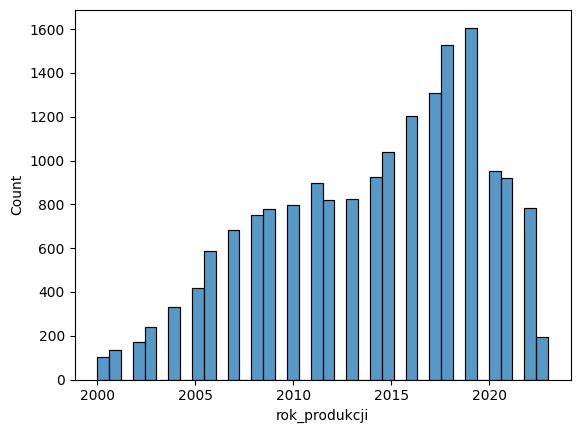

In [206]:
sns.histplot(X_train['rok_produkcji'])

In [207]:
X_train['przebieg']

1346     211 000 km
22361     85 800 km
2887     233 000 km
8208      12 800 km
8203     208 589 km
            ...    
12065     68 000 km
21756     58 000 km
5414     172 000 km
871      167 000 km
15913    138 858 km
Name: przebieg, Length: 18002, dtype: object

In [208]:
X_train['przebieg'] = X_train['przebieg'].str.replace('km', '').str.replace(' ', '').str.strip().astype(int)

<Axes: xlabel='przebieg', ylabel='Count'>

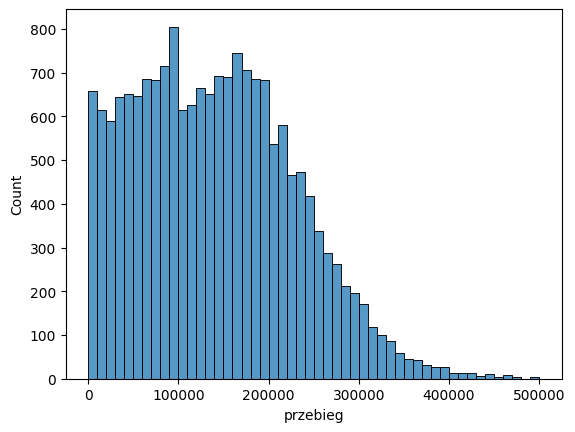

In [209]:
sns.histplot(X_train['przebieg'])

In [210]:
X_train['pojemność_skokowa']

1346     6 208 cm3
22361    1 197 cm3
2887     1 598 cm3
8208     1 332 cm3
8203     1 422 cm3
           ...    
12065          NaN
21756    5 654 cm3
5414     1 997 cm3
871      1 991 cm3
15913    1 499 cm3
Name: pojemność_skokowa, Length: 18002, dtype: object

In [211]:
X_train['pojemność_skokowa'] = X_train['pojemność_skokowa'].str.replace('cm3', '').str.replace(' ', '').astype(float)

<Axes: xlabel='pojemność_skokowa', ylabel='Count'>

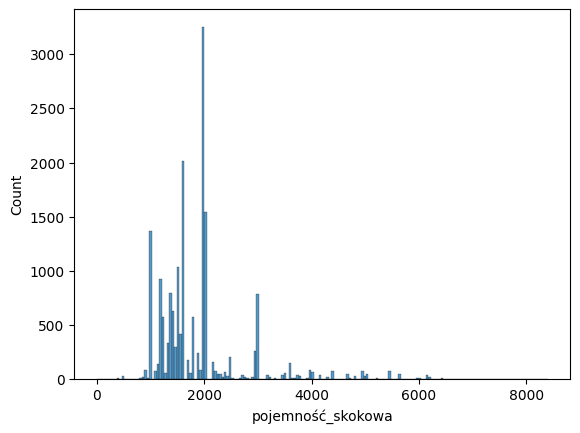

In [212]:
sns.histplot(X_train['pojemność_skokowa'])

In [213]:
X_train['cena']

1346     152500.0
22361     65000.0
2887      43960.0
8208     119900.0
8203      34500.0
           ...   
12065     78900.0
21756    214400.0
5414      42500.0
871      134000.0
15913     69000.0
Name: cena, Length: 18002, dtype: object

In [214]:
X_train['cena'] = X_train['cena'].astype(float)

<Axes: xlabel='cena', ylabel='Count'>

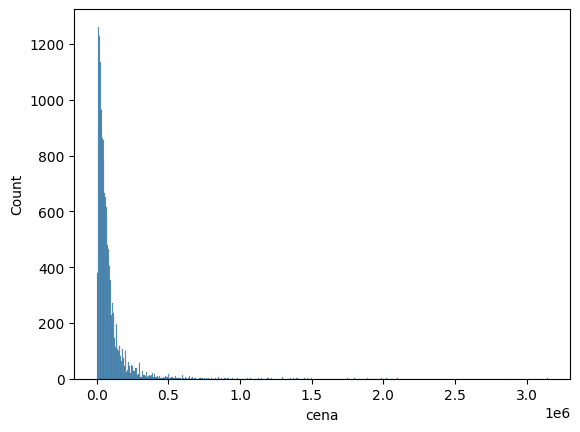

In [215]:
sns.histplot(X_train['cena'])

<Axes: xlabel='cena', ylabel='Count'>

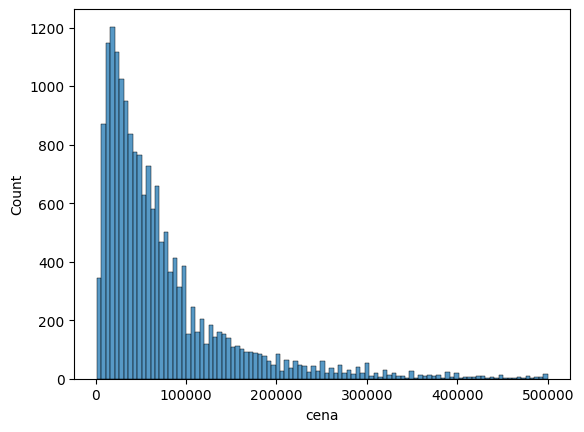

In [216]:
sns.histplot(X_train[X_train['cena'] < 500000]['cena'])

### Changing marka_pojazdu

In [217]:
X_train['marka_pojazdu'].unique()

array(['Mercedes-Benz', 'Nissan', 'Seat', 'Renault', 'Skoda', 'MINI',
       'Opel', 'BMW', 'Mazda', 'Volkswagen', 'Volvo', 'Kia', 'Ford',
       'Chevrolet', 'Toyota', 'Citroën', 'Peugeot', 'Dodge', 'Lexus',
       'Fiat', 'Audi', 'Honda', 'Suzuki', 'Infiniti', 'Daihatsu',
       'Porsche', 'Jeep', 'Hyundai', 'Lancia', 'Smart', 'Dacia',
       'Chrysler', 'Land Rover', 'Abarth', 'Aixam', 'RAM', 'Alfa Romeo',
       'Mitsubishi', 'Jaguar', 'DS Automobiles', 'Saab', 'Bentley',
       'Aston Martin', 'Subaru', 'Ligier', 'Maserati', 'Cadillac',
       'Cupra', 'Lamborghini', 'SsangYong', 'Alpine', 'Daewoo',
       'Microcar', 'KTM', 'Ferrari', 'McLaren', 'Inny', 'Rover', 'Tesla',
       'LTI', 'Caterham', 'Buick', 'BYD', 'Chatenet', 'Lotus', 'Lincoln',
       'Maybach', 'GMC', 'Polestar', 'Piaggio', 'Pontiac', 'BMW-ALPINA',
       'Tata', 'Isuzu', 'Lada', 'Acura'], dtype=object)

In [218]:
# https://www.wyborkierowcow.pl/ranking-prestizu-marek-samochodowych/

luxury_brands = ['Rolls-Royce', 'Ferrari', 'Aston Martin', 'Bentley', 'Lamborghini',
                 'McLaren', 'Maserati', 'Aston Martin', 'McLaren', 'Maybach']

premium_brands = ['Porsche', 'Jaguar', 'Lotus', 'Mercedes-Benz', 'BMW', 'Audi',
                  'Land Rover', 'Tesla', 'Lexus', 'Infiniti']

subpremium_brands = ['MINI', 'Volvo', 'Jeep', 'Alfa Romeo', 'DS', 'Cupra', 'Alpine',
                     'BMW-ALPINA', 'Abarth', 'Mazda']

popular_brands = ['Volkswagen', 'Opel', 'Ford', 'Dodge', 'Kia','Chevrolet',
                  'Hyundai', 'Skoda', 'Seat', 'Renault', 'Toyota', 'Subaru',
                  'Honda', 'Nissan', 'Peugeot', 'Chrysler', 'Saab', 'Citroën',
                  'Mitsubishi', 'Suzuki', 'Fiat', 'Smart', 'Cadillac',
                  'Pontiac', 'Lancia', 'Dacia', 'SsangYong']

In [219]:
# Changing the brand to a luxurious, popular (the brand name remains) and other
brand_dict = {'Luksusowa': luxury_brands, 'Popularna': popular_brands + premium_brands + subpremium_brands}

In [220]:
def brand_type(brand, map_dict=brand_dict):
    if brand in map_dict['Luksusowa']:
        return 'Luksusowa'
    elif brand in map_dict['Popularna']:
        return brand
    else:
        return 'INNA'

brand_type('Audi')

'Audi'

In [221]:
X_train['marka_pojazdu'] = X_train['marka_pojazdu'].apply(lambda x: brand_type(x))

In [222]:
X_train['marka_pojazdu'].value_counts()

Volkswagen       1650
BMW              1484
Ford             1419
Mercedes-Benz    1355
Opel             1274
Audi             1262
Toyota           1046
Renault           965
Skoda             907
Peugeot           770
Citroën           615
Kia               551
Fiat              508
Hyundai           453
Volvo             437
Seat              368
Nissan            331
Mazda             290
MINI              266
Honda             253
Porsche           188
Suzuki            181
Dacia             145
Chevrolet         138
Mitsubishi        102
INNA              101
Jeep               96
Alfa Romeo         95
Dodge              94
Luksusowa          91
Lexus              86
Jaguar             81
Chrysler           79
Land Rover         64
Subaru             56
Smart              55
Infiniti           29
Saab               28
Lancia             24
Abarth             21
Cupra              12
SsangYong          11
Tesla              11
Cadillac            3
Alpine              2
Lotus     

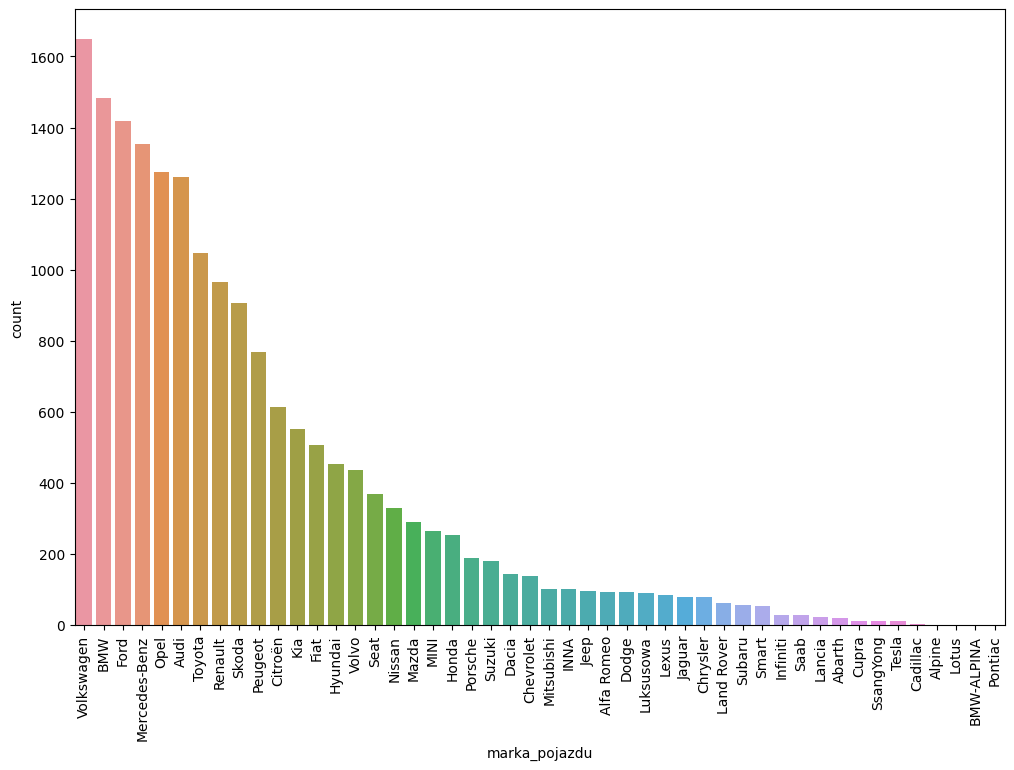

In [223]:
plt.figure(figsize = (12, 8))
sns.countplot(x='marka_pojazdu', data=X_train, order=list(X_train['marka_pojazdu'].value_counts().index))
plt.xticks(rotation = 90);

### Filling missing values

In [224]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18002 entries, 1346 to 15913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   oferta_od          18002 non-null  object 
 1   marka_pojazdu      18002 non-null  object 
 2   model_pojazdu      18002 non-null  object 
 3   rok_produkcji      18002 non-null  int64  
 4   przebieg           18002 non-null  int64  
 5   pojemność_skokowa  17749 non-null  float64
 6   rodzaj_paliwa      18002 non-null  object 
 7   cena               18002 non-null  float64
 8   skrzynia_biegów    17986 non-null  object 
 9   napęd              16932 non-null  object 
 10  typ_nadwozia       18002 non-null  object 
 11  liczba_drzwi       17978 non-null  float64
 12  liczba_miejsc      17352 non-null  float64
 13  kolor              18002 non-null  object 
 14  leasing            2649 non-null   object 
 15  bezwypadkowy       11616 non-null  object 
dtypes: float64(4), int6

In [225]:
X_train.describe()

,rok_produkcji,przebieg,pojemność_skokowa,cena,liczba_drzwi,liczba_miejsc
count,18002.000000,18002.000000,17749.000000,1.800200e+04,17978.000000,17352.000000
mean,2014.025942,141855.378958,1894.791538,8.258360e+04,4.438202,4.909866
std,5.445830,87818.699315,863.132638,1.207540e+05,0.993886,0.930438
min,2000.000000,1.000000,1.000000,1.500000e+03,2.000000,1.000000
25%,2010.000000,70260.750000,1390.000000,2.530000e+04,4.000000,5.000000
50%,2015.000000,137000.000000,1685.000000,5.000000e+04,5.000000,5.000000
75%,2018.000000,201634.000000,1997.000000,9.300000e+04,5.000000,5.000000
max,2023.000000,500000.000000,8400.000000,3.149000e+06,6.000000,9.000000


In [226]:
X_train.describe(include='object')

,oferta_od,marka_pojazdu,model_pojazdu,rodzaj_paliwa,skrzynia_biegów,napęd,typ_nadwozia,kolor,leasing,bezwypadkowy
count,18002,18002,18002,18002,17986,16932,18002,18002,2649,11616
unique,2,48,751,6,2,5,9,17,1,1
top,Prywatne,Volkswagen,Astra,Benzyna,Manualna,Na przednie koła,Kombi,Czarny,Tak,Tak
freq,11651,1650,392,9763,10581,11989,2479,4301,2649,11616


In [227]:
missing_data = X_train.isnull().sum()
missing_data

oferta_od                0
marka_pojazdu            0
model_pojazdu            0
rok_produkcji            0
przebieg                 0
pojemność_skokowa      253
rodzaj_paliwa            0
cena                     0
skrzynia_biegów         16
napęd                 1070
typ_nadwozia             0
liczba_drzwi            24
liczba_miejsc          650
kolor                    0
leasing              15353
bezwypadkowy          6386
dtype: int64

In [228]:
missing_data[missing_data > 0]

pojemność_skokowa      253
skrzynia_biegów         16
napęd                 1070
liczba_drzwi            24
liczba_miejsc          650
leasing              15353
bezwypadkowy          6386
dtype: int64

In [229]:
cols_to_fill = list(missing_data[missing_data > 0].index)
cols_to_fill

['pojemność_skokowa',
 'skrzynia_biegów',
 'napęd',
 'liczba_drzwi',
 'liczba_miejsc',
 'leasing',
 'bezwypadkowy']

In [230]:
for col in cols_to_fill:
    print(f'{col}; number of missing values: {X_train[col].isnull().sum()}')
    print(X_train[col].value_counts())

    print(40 * '-')

pojemność_skokowa; number of missing values: 253
1598.0    1330
1968.0    1078
1995.0     767
999.0      758
1997.0     738
          ... 
4701.0       1
3644.0       1
2399.0       1
1951.0       1
1191.0       1
Name: pojemność_skokowa, Length: 427, dtype: int64
----------------------------------------
skrzynia_biegów; number of missing values: 16
Manualna        10581
Automatyczna     7405
Name: skrzynia_biegów, dtype: int64
----------------------------------------
napęd; number of missing values: 1070
Na przednie koła                 11989
Na tylne koła                     1860
4x4 (stały)                       1649
4x4 (dołączany automatycznie)     1307
4x4 (dołączany ręcznie)            127
Name: napęd, dtype: int64
----------------------------------------
liczba_drzwi; number of missing values: 24
5.0    12810
4.0     1934
2.0     1716
3.0     1512
6.0        6
Name: liczba_drzwi, dtype: int64
----------------------------------------
liczba_miejsc; number of missing values: 650


#### leasing, bezwypadkowy (strategy='constant', fill_value='brak_danych')

In [231]:
X_train[['bezwypadkowy', 'leasing']].isna().sum()

bezwypadkowy     6386
leasing         15353
dtype: int64

In [232]:
X_train['bezwypadkowy'] = X_train['bezwypadkowy'].map({'Tak': 'Tak', np.nan: 'brak_danych', None: 'brak_danych'})
X_train['leasing'] = X_train['leasing'].map({'Tak': 'Tak', np.nan: 'brak_danych', None: 'brak_danych'})

In [233]:
X_train[['bezwypadkowy', 'leasing']].isna().sum()

bezwypadkowy    0
leasing         0
dtype: int64

#### pojemność_skokowa (strategy='constant', fill_value=0)

In [234]:
X_train[X_train['pojemność_skokowa'].isna()]

,oferta_od,marka_pojazdu,model_pojazdu,rok_produkcji,przebieg,pojemność_skokowa,rodzaj_paliwa,cena,skrzynia_biegów,napęd,typ_nadwozia,liczba_drzwi,liczba_miejsc,kolor,leasing,bezwypadkowy
10412,Prywatne,Fiat,500,2014,80000,NaN,Elektryczny,39900.0,Automatyczna,Na przednie koła,Auta małe,3.0,5.0,Fioletowy,brak_danych,Tak
8156,Firma,Kia,EV6,2022,14014,NaN,Elektryczny,179899.0,Automatyczna,Na tylne koła,Kompakt,5.0,5.0,Zielony,brak_danych,Tak
12757,Firma,Peugeot,208,2022,4,NaN,Elektryczny,154900.0,Automatyczna,Na przednie koła,Auta miejskie,5.0,5.0,Biały,Tak,Tak
10560,Prywatne,Fiat,500,2021,14750,NaN,Elektryczny,89400.0,Automatyczna,Na przednie koła,Auta małe,3.0,4.0,Niebieski,brak_danych,brak_danych
11893,Prywatne,Fiat,500,2010,31200,NaN,Elektryczny,49000.0,Automatyczna,Na przednie koła,Auta małe,3.0,4.0,Czerwony,brak_danych,Tak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8074,Firma,Cupra,Born,2022,9730,NaN,Elektryczny,205900.0,Automatyczna,Na przednie koła,Kompakt,5.0,5.0,Srebrny,Tak,Tak
7230,Prywatne,Nissan,Leaf,2019,62000,NaN,Elektryczny,89000.0,Automatyczna,Na przednie koła,Kompakt,5.0,5.0,Czerwony,brak_danych,Tak
22183,Firma,Jaguar,I-Pace,2019,26340,NaN,Elektryczny,219000.0,Automatyczna,4x4 (stały),SUV,5.0,5.0,Czarny,brak_danych,Tak
8534,Firma,Renault,Megane,2022,5687,NaN,Elektryczny,179000.0,Automatyczna,Na przednie koła,Kompakt,5.0,5.0,Niebieski,brak_danych,Tak


In [235]:
X_train[X_train['pojemność_skokowa'].isna()]['rodzaj_paliwa'].value_counts()

Elektryczny    253
Name: rodzaj_paliwa, dtype: int64

In [236]:
imputer_pojemnosc_skokowa = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
imputer_pojemnosc_skokowa.fit_transform(X_train[['pojemność_skokowa']])

array([[6208.],
       [1197.],
       [1598.],
       ...,
       [1997.],
       [1991.],
       [1499.]])

In [237]:
imputer_pojemnosc_skokowa.statistics_

array([0.])

In [238]:
X_train['pojemność_skokowa'] = imputer_pojemnosc_skokowa.fit_transform(X_train[['pojemność_skokowa']])

In [239]:
X_train['pojemność_skokowa'].isnull().sum()

0

#### skrzynia_biegów, napęd, liczba_drzwi, liczba_miejsc (strategy='most_frequent')

In [240]:
missing_data = X_train.isnull().sum()

cols_to_fill = list(missing_data[missing_data > 0].index)
cols_to_fill

['skrzynia_biegów', 'napęd', 'liczba_drzwi', 'liczba_miejsc']

In [241]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')


for col in cols_to_fill:
    print(f"{col}; number of missing values: {X_train[col].isnull().sum()}")
    X_train[col] = imputer.fit_transform(X_train[[col]])
    print(f"The most common value: {imputer.statistics_}")
    print(40 * '-')

skrzynia_biegów; number of missing values: 16
The most common value: ['Manualna']
----------------------------------------
napęd; number of missing values: 1070
The most common value: ['Na przednie koła']
----------------------------------------
liczba_drzwi; number of missing values: 24
The most common value: [5.]
----------------------------------------
liczba_miejsc; number of missing values: 650
The most common value: [5.]
----------------------------------------


In [242]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18002 entries, 1346 to 15913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   oferta_od          18002 non-null  object 
 1   marka_pojazdu      18002 non-null  object 
 2   model_pojazdu      18002 non-null  object 
 3   rok_produkcji      18002 non-null  int64  
 4   przebieg           18002 non-null  int64  
 5   pojemność_skokowa  18002 non-null  float64
 6   rodzaj_paliwa      18002 non-null  object 
 7   cena               18002 non-null  float64
 8   skrzynia_biegów    18002 non-null  object 
 9   napęd              18002 non-null  object 
 10  typ_nadwozia       18002 non-null  object 
 11  liczba_drzwi       18002 non-null  float64
 12  liczba_miejsc      18002 non-null  float64
 13  kolor              18002 non-null  object 
 14  leasing            18002 non-null  object 
 15  bezwypadkowy       18002 non-null  object 
dtypes: float64(4), int6

### Changing y data type to float

In [243]:
y_train

1346     525 KM
22361    115 KM
2887     110 KM
8208     158 KM
8203      90 KM
          ...  
12065    170 KM
21756    401 KM
5414     163 KM
871      245 KM
15913    102 KM
Name: Moc, Length: 18002, dtype: object

In [244]:
y_train = y_train.str.replace('KM', '').str.replace(' ', '').astype(float)

In [245]:
y_train

1346     525.0
22361    115.0
2887     110.0
8208     158.0
8203      90.0
         ...  
12065    170.0
21756    401.0
5414     163.0
871      245.0
15913    102.0
Name: Moc, Length: 18002, dtype: float64

# <a name='4'></a> EDA

In [246]:
eda_df = X_train.join(y_train)
eda_df.head()

,oferta_od,marka_pojazdu,model_pojazdu,rok_produkcji,przebieg,pojemność_skokowa,rodzaj_paliwa,cena,skrzynia_biegów,napęd,typ_nadwozia,liczba_drzwi,liczba_miejsc,kolor,leasing,bezwypadkowy,Moc
1346,Prywatne,Mercedes-Benz,CL,2007,211000,6208.0,Benzyna,152500.0,Automatyczna,Na tylne koła,Coupe,2.0,4.0,Czarny,brak_danych,brak_danych,525.0
22361,Prywatne,Nissan,Qashqai,2017,85800,1197.0,Benzyna,65000.0,Manualna,Na przednie koła,SUV,5.0,5.0,Szary,brak_danych,Tak,115.0
2887,Prywatne,Seat,Leon,2016,233000,1598.0,Diesel,43960.0,Automatyczna,Na przednie koła,Kombi,5.0,5.0,Srebrny,brak_danych,Tak,110.0
8208,Firma,Renault,Arkana,2022,12800,1332.0,Benzyna,119900.0,Automatyczna,Na przednie koła,Kompakt,5.0,5.0,Czerwony,Tak,Tak,158.0
8203,Prywatne,Skoda,RAPID,2017,208589,1422.0,Diesel,34500.0,Automatyczna,Na przednie koła,Kompakt,5.0,5.0,Czerwony,brak_danych,brak_danych,90.0


In [247]:
def plot_two_rel(data, X_feat, Y_feat, hue=None, fig_size=(8, 8)):

    display(data[[X_feat, Y_feat]].corr().round(3))
    plt.figure(figsize=fig_size)
    sns.scatterplot(data = data, x = X_feat, y =  Y_feat, hue = hue)
    plt.title(f"Relation of: {X_feat} & {Y_feat}")
    plt.grid()
    plt.show()

Text(0.5, 1.0, 'Distribution of vehicle brand to price')

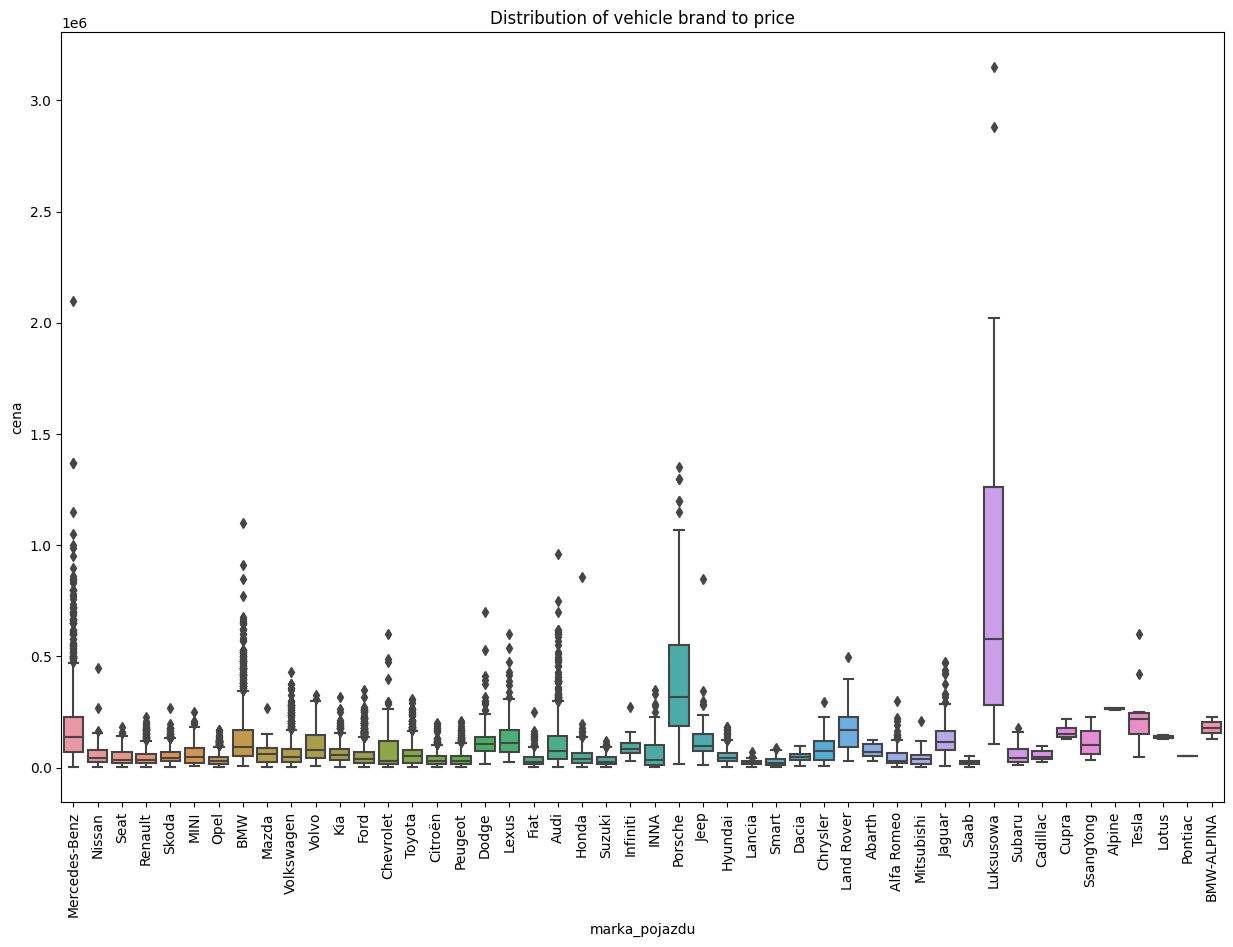

In [248]:
# brand to price
plt.figure(figsize = (15, 10))
sns.boxplot(data=eda_df, x='marka_pojazdu', y='cena')
plt.xticks(rotation=90)
plt.title('Distribution of vehicle brand to price')

Text(0.5, 1.0, 'Distribution of vehicle brand to power')

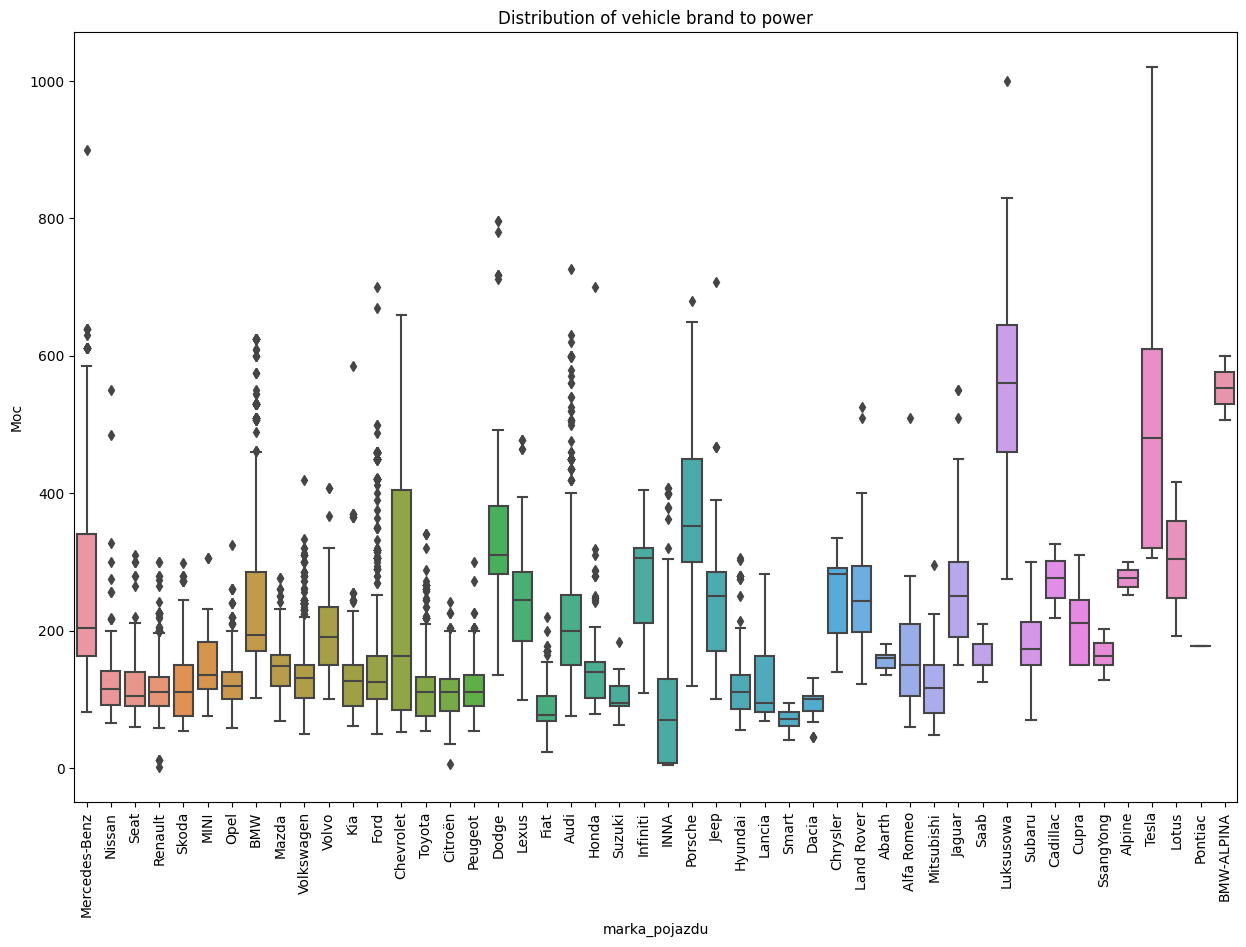

In [249]:
# brand to power
plt.figure(figsize = (15, 10))
sns.boxplot(data=eda_df, x='marka_pojazdu', y='Moc')
plt.xticks(rotation=90)
plt.title('Distribution of vehicle brand to power')

In [250]:
def agg_data(data, agg_feat, feat):
    return data.groupby([agg_feat]).agg(
                            min_ = (feat,"min"),
                            perc_1 = (feat,lambda x: np.percentile(x, 1)),
                            perc_5 = (feat,lambda x: np.percentile(x, 5)),
                            perc_25 = (feat,lambda x: np.percentile(x, 25)),
                            mean = (feat,"mean"),
                            perc_50 = (feat,lambda x: np.percentile(x, 50)),
                            perc_75 = (feat,lambda x: np.percentile(x, 75)),
                            perc_95 = (feat,lambda x: np.percentile(x, 95)),
                            perc_99 = (feat,lambda x: np.percentile(x, 99)),
                            max_ = (feat,"max"),
                            _n_ = (feat,"count")
                            ).round(2)

In [251]:
agg_data(eda_df, 'marka_pojazdu', 'cena').sort_values("perc_50", ascending = False) # perc_50 == median

,min_,perc_1,perc_5,perc_25,mean,perc_50,perc_75,perc_95,perc_99,max_,_n_
marka_pojazdu,,,,,,,,,,,
Luksusowa,105900.0,107790.00,131950.00,284000.00,805428.71,579900.0,1260625.20,1959000.00,2906900.00,3149000.0,91
Porsche,17500.0,44314.00,88985.00,186875.00,398047.40,316000.0,552250.00,1045850.00,1299999.13,1349999.0,188
Alpine,259000.0,259109.00,259545.00,261725.00,264450.00,264450.0,267175.00,269355.00,269791.00,269900.0,2
Tesla,50019.0,58017.00,90009.00,149450.00,235871.64,220170.0,244500.00,509000.00,581000.00,599000.0,11
BMW-ALPINA,129999.0,130999.01,134999.05,154999.25,179999.50,179999.5,204999.75,224999.95,228999.99,230000.0,2
Land Rover,31500.0,32382.00,46100.00,91650.00,177293.69,167850.5,227725.00,379616.50,436000.00,499000.0,64
Cupra,127777.0,127801.53,127899.65,137350.00,159939.75,150200.0,177750.00,212200.00,218360.00,219900.0,12
Mercedes-Benz,2500.0,8900.00,17900.00,69850.00,180395.13,139777.0,229900.00,499930.00,834059.54,2099999.0,1355
Lotus,129900.0,130051.00,130655.00,133675.00,137450.00,137450.0,141225.00,144245.00,144849.00,145000.0,2


In [252]:
agg_data(eda_df, 'marka_pojazdu', 'Moc').sort_values("mean", ascending = False)

,min_,perc_1,perc_5,perc_25,mean,perc_50,perc_75,perc_95,perc_99,max_,_n_
marka_pojazdu,,,,,,,,,,,
Luksusowa,275.0,324.50,402.50,460.00,566.38,560.0,645.00,735.00,847.00,1000.0,91
BMW-ALPINA,507.0,507.93,511.65,530.25,553.50,553.5,576.75,595.35,599.07,600.0,2
Tesla,306.0,306.00,306.00,320.00,523.73,480.0,609.50,908.00,997.60,1020.0,11
Porsche,120.0,244.22,250.00,300.00,379.79,352.0,450.00,580.00,650.00,680.0,188
Dodge,136.0,139.72,140.00,283.00,346.65,309.5,381.00,717.00,797.00,797.0,94
Lotus,192.0,194.24,203.20,248.00,304.00,304.0,360.00,404.80,413.76,416.0,2
Alpine,252.0,252.48,254.40,264.00,276.00,276.0,288.00,297.60,299.52,300.0,2
Cadillac,218.0,219.16,223.80,247.00,273.33,276.0,301.00,321.00,325.00,326.0,3
Infiniti,109.0,109.00,127.80,211.00,270.93,306.0,320.00,405.00,405.00,405.0,29


In [253]:
agg_data(eda_df, 'rok_produkcji', 'Moc').sort_values("mean", ascending = False)

,min_,perc_1,perc_5,perc_25,mean,perc_50,perc_75,perc_95,perc_99,max_,_n_
rok_produkcji,,,,,,,,,,,
2023,70.0,70.00,94.40,136.00,243.60,190.0,304.50,534.90,650.00,680.0,194
2022,6.0,67.00,72.00,120.00,198.11,160.0,228.50,488.80,631.80,1020.0,783
2021,8.0,60.00,72.00,110.00,189.13,150.0,230.00,450.50,622.53,720.0,920
2020,8.0,60.00,72.00,110.00,182.95,150.0,204.00,435.00,625.00,797.0,950
2019,8.0,60.00,72.00,111.00,177.83,150.0,192.00,435.00,550.00,800.0,1607
2018,6.0,60.00,72.00,110.00,173.80,149.0,190.00,400.60,610.00,900.0,1529
2016,5.0,60.00,70.00,110.00,173.11,150.0,190.00,381.00,549.60,717.0,1205
2017,5.0,60.00,70.00,109.00,169.57,149.0,190.00,381.00,580.46,800.0,1310
2015,1.0,60.00,69.00,110.00,169.05,150.0,190.00,350.40,541.00,796.0,1039


Text(0.5, 1.0, 'Distribution of vehicle brand to power (median)')

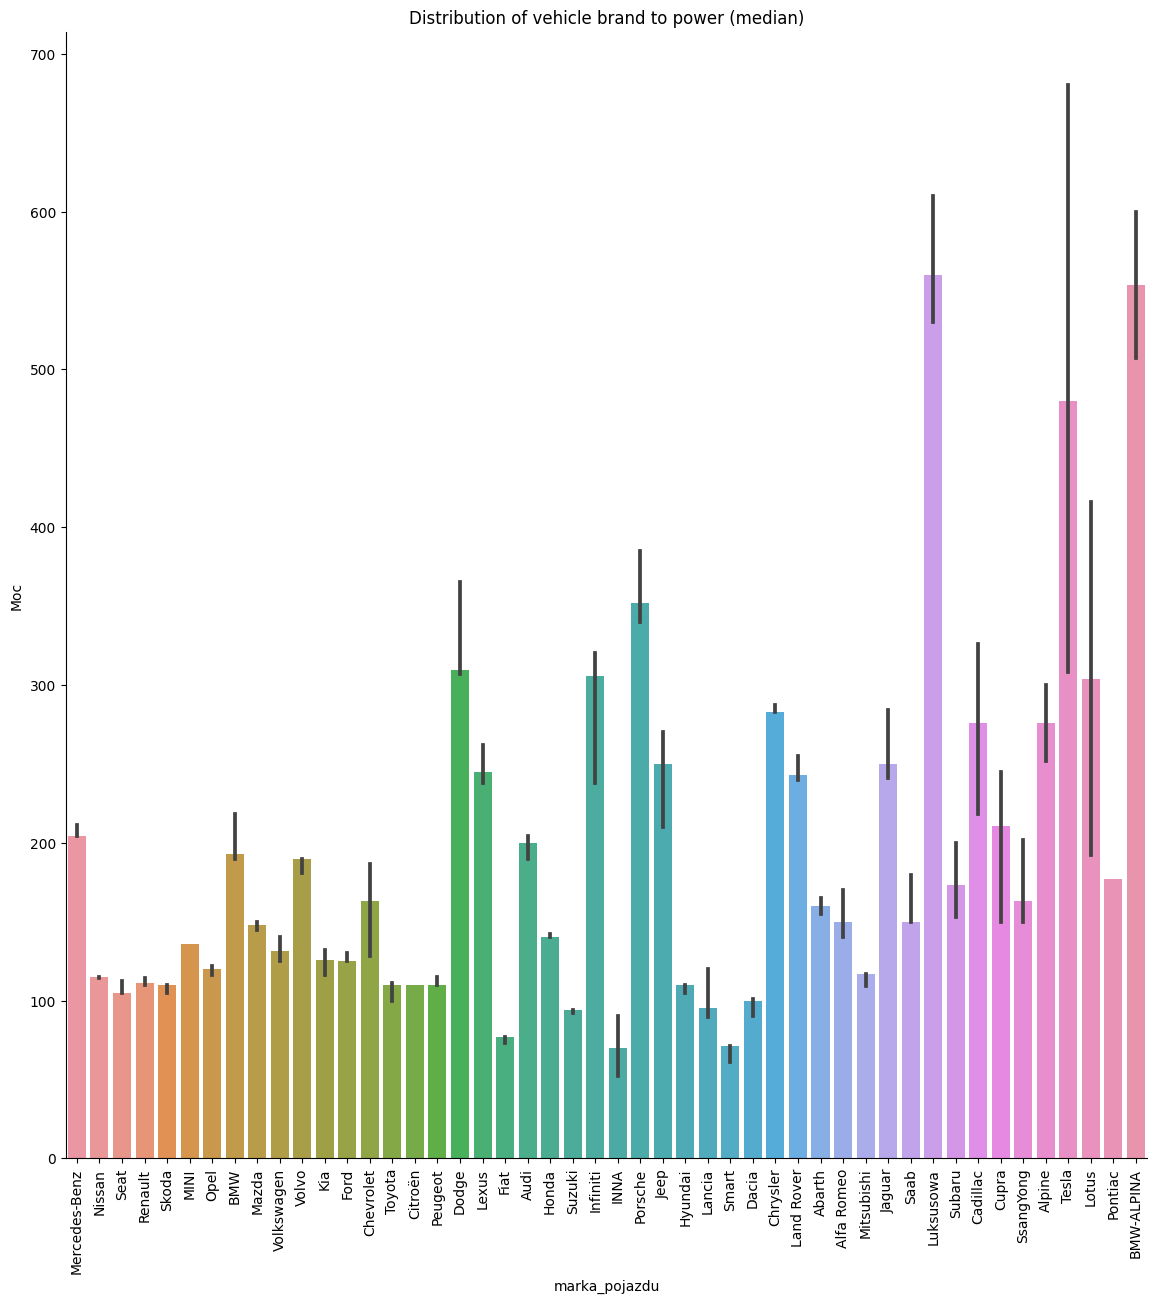

In [254]:
my_plot = sns.catplot(data=eda_df, x='marka_pojazdu', y='Moc', kind='bar', height=12, estimator=np.median)
my_plot.set_xticklabels(rotation=90)
plt.title('Distribution of vehicle brand to power (median)')

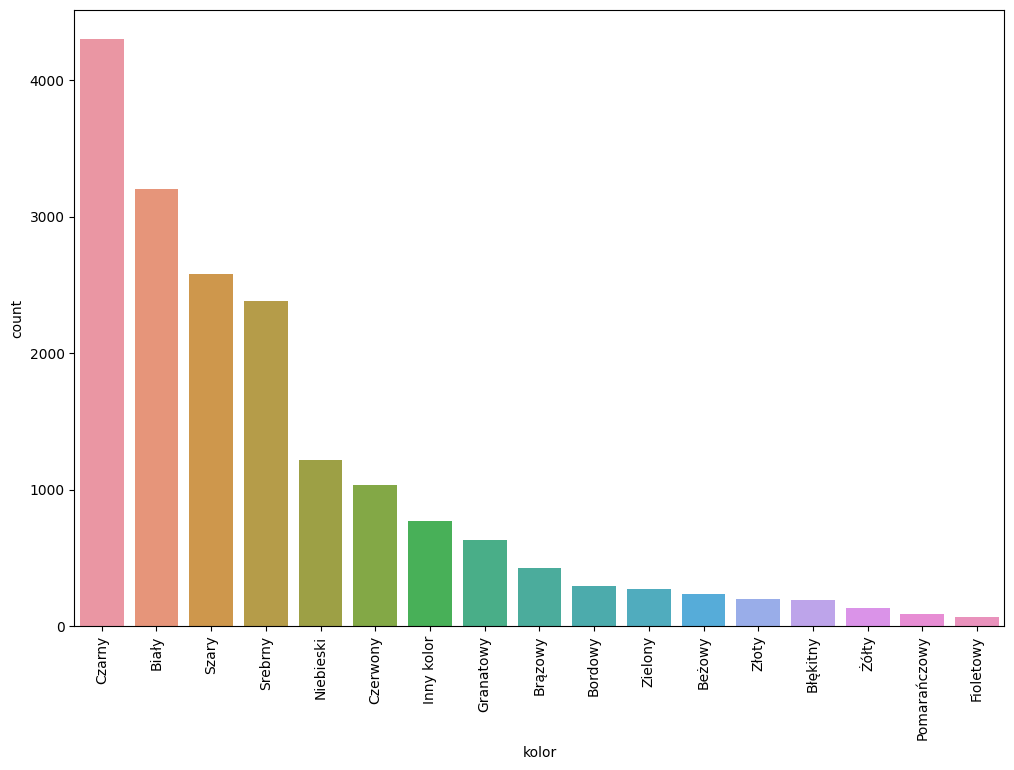

In [255]:
# car color distribution
plt.figure(figsize = (12, 8))
sns.countplot(x='kolor', data=X_train, order=X_train['kolor'].value_counts().index);
plt.xticks(rotation = 90);

,rok_produkcji,cena
rok_produkcji,1.000,0.417
cena,0.417,1.000


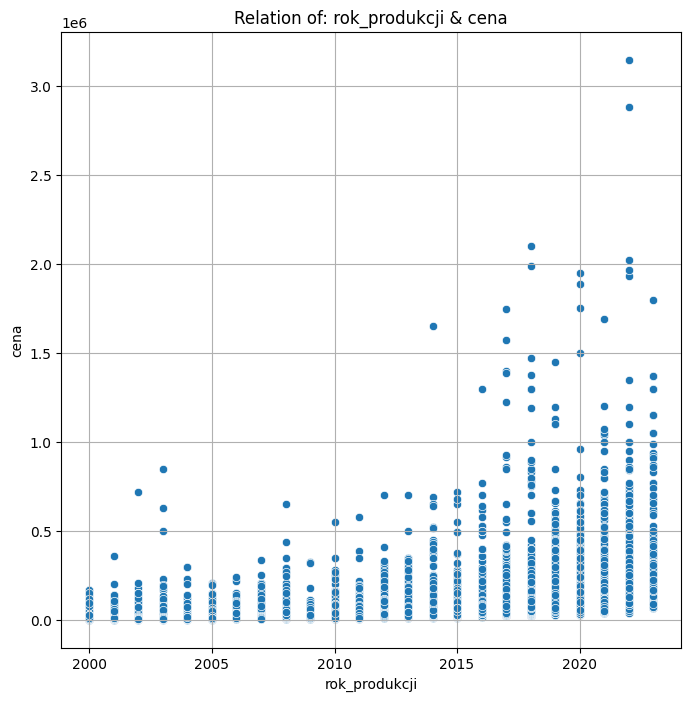

In [256]:
plot_two_rel(eda_df, 'rok_produkcji', 'cena')

,Moc,przebieg
Moc,1.000,-0.183
przebieg,-0.183,1.000


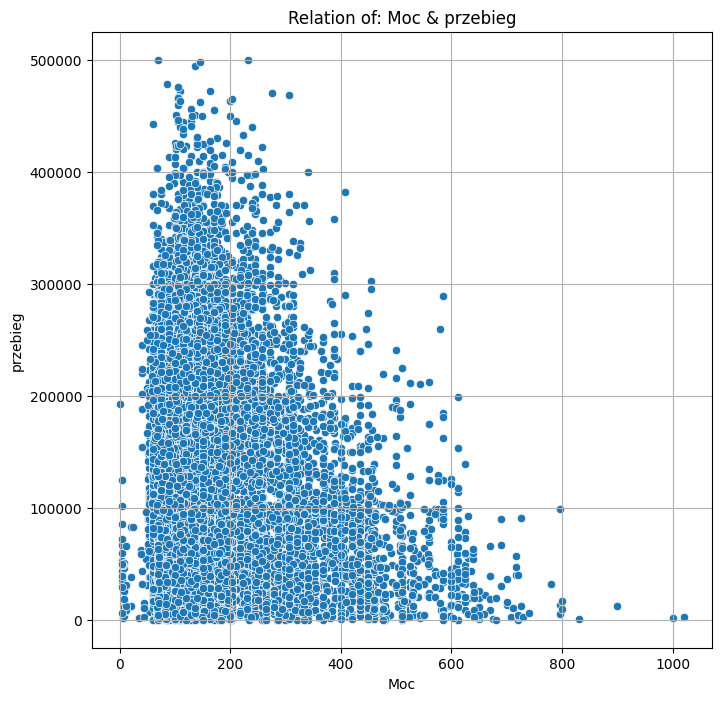

In [257]:
# power distribution to mileage
plot_two_rel(eda_df, 'Moc', 'przebieg')

,Moc,pojemność_skokowa
Moc,1.000,0.812
pojemność_skokowa,0.812,1.000


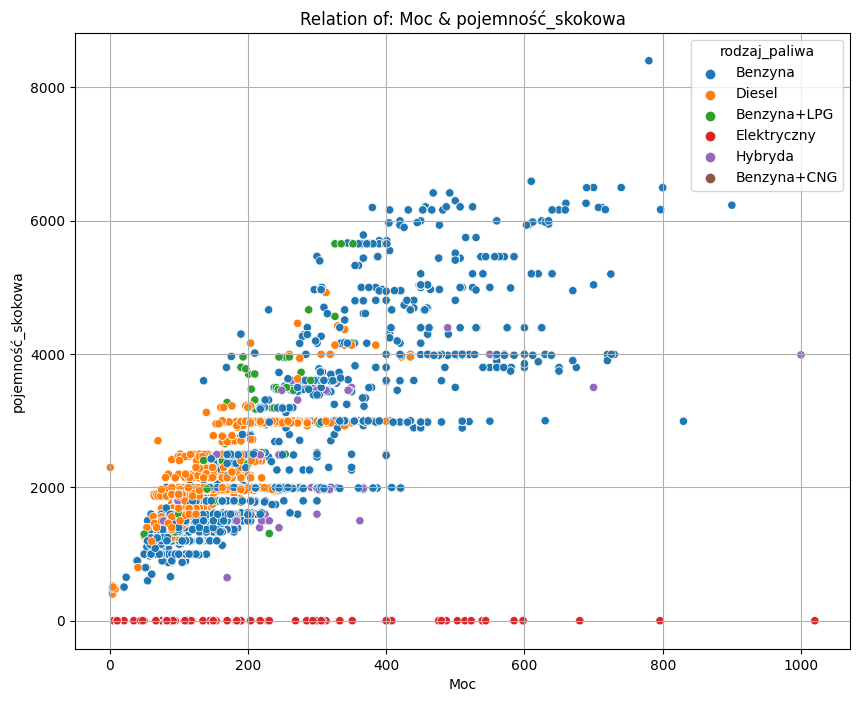

In [258]:
# power distribution to engine capacity with fuel distribution
plot_two_rel(eda_df, 'Moc', 'pojemność_skokowa', hue='rodzaj_paliwa', fig_size=(10, 8))

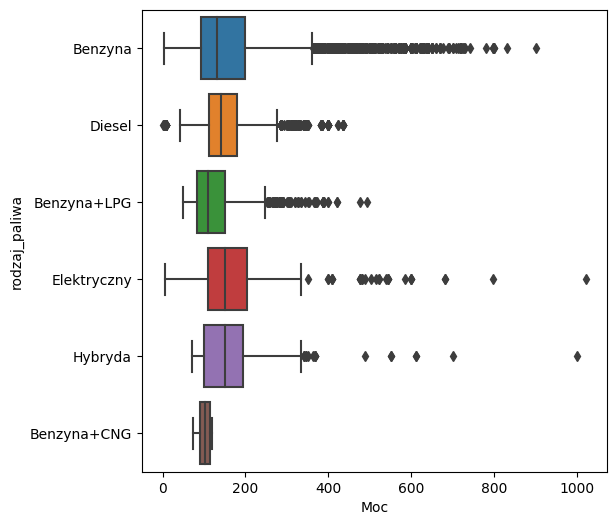

In [259]:
plt.figure(figsize = (6, 6))
sns.boxplot(data=eda_df, y='rodzaj_paliwa', x='Moc');

,Moc,pojemność_skokowa
Moc,1.000,0.812
pojemność_skokowa,0.812,1.000


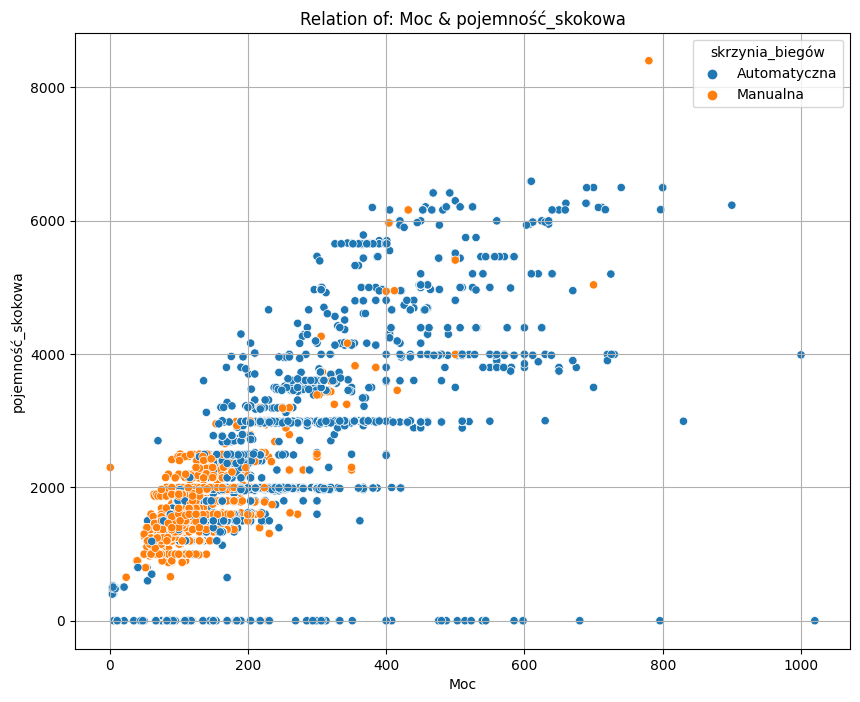

In [260]:
# power distribution to engine capacity with transmission
plot_two_rel(eda_df, 'Moc', 'pojemność_skokowa', hue='skrzynia_biegów', fig_size=(10, 8))

In [261]:
agg_data(eda_df, 'skrzynia_biegów','Moc').sort_values("perc_50", ascending = False)

,min_,perc_1,perc_5,perc_25,mean,perc_50,perc_75,perc_95,perc_99,max_,_n_
skrzynia_biegów,,,,,,,,,,,
Automatyczna,4.0,61.0,100.0,150.0,228.66,190.0,272.0,468.0,625.0,1020.0,7405
Manualna,1.0,58.0,66.0,90.0,116.65,110.0,140.0,180.0,300.0,780.0,10597


In [262]:
correlations_matrix  = eda_df.corr()
correlations_matrix
#sns.heatmap(correlations_matrix)

<ipython-input-262-7781b7377a0f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_matrix  = eda_df.corr()


,rok_produkcji,przebieg,pojemność_skokowa,cena,liczba_drzwi,liczba_miejsc,Moc
rok_produkcji,1.000000,-0.670404,-0.073545,0.417485,0.190365,0.055542,0.183314
przebieg,-0.670404,1.000000,0.054282,-0.402578,0.052226,0.156729,-0.182991
pojemność_skokowa,-0.073545,0.054282,1.000000,0.448164,-0.332406,-0.076764,0.812329
cena,0.417485,-0.402578,0.448164,1.000000,-0.200019,-0.116224,0.710870
liczba_drzwi,0.190365,0.052226,-0.332406,-0.200019,1.000000,0.468130,-0.323576
liczba_miejsc,0.055542,0.156729,-0.076764,-0.116224,0.468130,1.000000,-0.127483
Moc,0.183314,-0.182991,0.812329,0.710870,-0.323576,-0.127483,1.000000


<ipython-input-263-e352a9e966ce>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlations_matrix, dtype=np.bool))


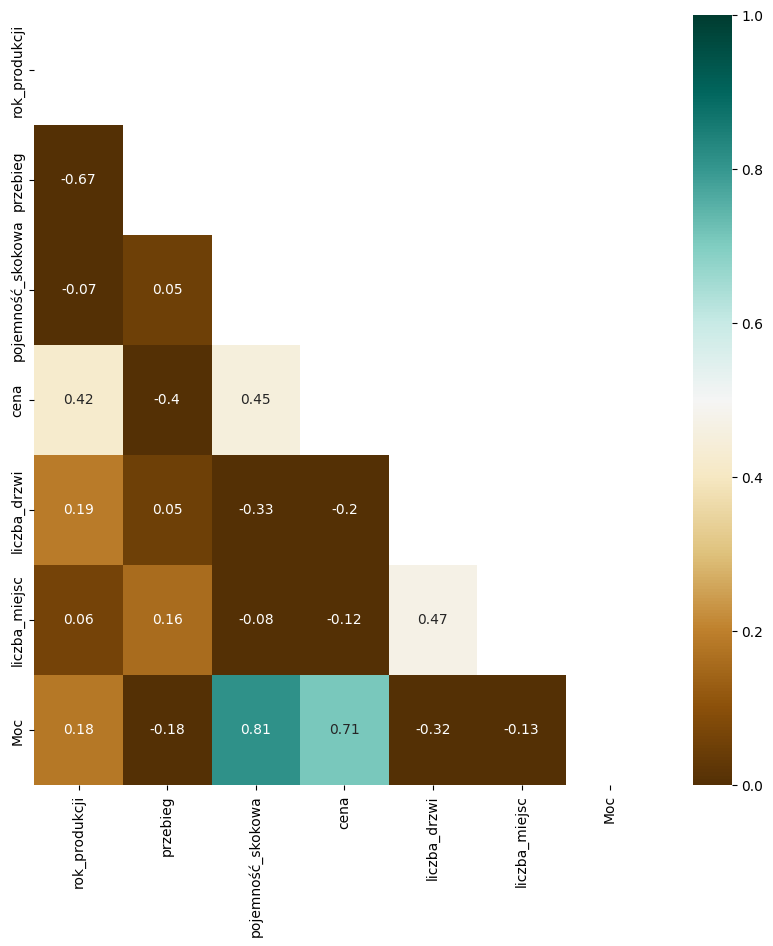

In [263]:
plt.figure(figsize=(10, 10))
mask = np.triu(np.ones_like(correlations_matrix, dtype=np.bool))
sns.heatmap(correlations_matrix.round(2), mask=mask,
            vmin=0, vmax=1,
            annot=True, cmap='BrBG')
plt.xticks(rotation=90);

In [264]:
eda_grouped = eda_df.groupby('rok_produkcji')

In [265]:
eda_grouped.get_group(2023)['Moc'].mean()

243.5979381443299

In [266]:
eda_grouped.get_group(2023)['pojemność_skokowa'].mean()

2032.541237113402

In [267]:
eda_df[eda_df['rok_produkcji'] == 2023]['pojemność_skokowa'].mean()

2032.541237113402

In [268]:
mean_power_capacity_df = pd.pivot_table(data=eda_df, index='rok_produkcji',# columns='typ_nadwozia',
                                        aggfunc={'pojemność_skokowa': 'mean', 'Moc': 'mean'})

In [270]:
mean_power_capacity_df

,Moc,pojemność_skokowa
rok_produkcji,,
2000,151.740385,2216.990385
2001,148.691729,2176.917293
2002,150.531792,2207.919075
2003,142.416667,2093.845833
2004,139.340361,2027.602410
2005,138.409524,2004.423810
2006,134.943878,1935.132653
2007,145.711144,2032.539589
2008,142.203728,1931.446072


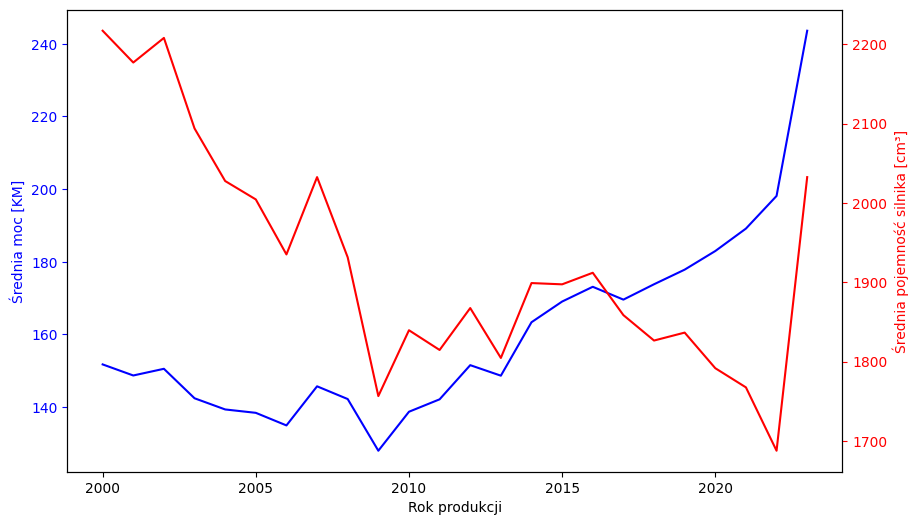

In [271]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(mean_power_capacity_df.index, mean_power_capacity_df['Moc'], color='b')
ax.set_xlabel('Rok produkcji')
ax.set_ylabel('Średnia moc [KM]', color='b')
ax.tick_params('y', colors='b')

ax2 = ax.twinx() # Klonujemy oś

ax2.plot(mean_power_capacity_df.index, mean_power_capacity_df['pojemność_skokowa'], color='r')
ax2.set_xlabel('Rok produkcji')
ax2.set_ylabel('Średnia pojemność silnika [cm³]', color='r')
ax2.tick_params('y', colors='r')

plt.show()

#### Conclusions


Observations carried out on the training set show that:

-most cars were produced in 2017-2019,

-most cars have a mileage of less than 200000 km,

-as the engine capacity increases, the power increases,

-the most powerful cars have gasoline or electric engines

-cars with high power have lower mileage,

-the newer the car, the higher the price,

-highly powerful cars have automatic transmissions,

-we notice a decrease in engines capacity and an increase in power.

# <a name='5'></a> Model

In [272]:
categorical_features = list(X_train.select_dtypes(include="object").columns)
categorical_features

['oferta_od',
 'marka_pojazdu',
 'model_pojazdu',
 'rodzaj_paliwa',
 'skrzynia_biegów',
 'napęd',
 'typ_nadwozia',
 'kolor',
 'leasing',
 'bezwypadkowy']

In [273]:
numeric_features = list(X_train.select_dtypes(include=["int", "float"]).columns)
numeric_features

['rok_produkcji',
 'przebieg',
 'pojemność_skokowa',
 'cena',
 'liczba_drzwi',
 'liczba_miejsc']

In [274]:
sc = StandardScaler()
#pf = PolynomialFeatures(include_bias=False)
ohe = OneHotEncoder(drop='first',
                    handle_unknown='infrequent_if_exist') #handle_unknown{‘error’, ‘ignore’, ‘infrequent_if_exist’}, default=’error’

In [275]:
cf = ColumnTransformer(
    transformers=[
        ('sc', sc, numeric_features),
        #('pf', pf, numeric_features),
        ('ohe', ohe, categorical_features)
    ]
)

In [276]:
X_train_processed = cf.fit_transform(X_train)
X_train_processed

<18002x840 sparse matrix of type '<class 'numpy.float64'>'
	with 246470 stored elements in Compressed Sparse Row format>

In [ ]:
cf.get_feature_names_out()

In [ ]:
X_train_processed.toarray()

In [278]:
pd.DataFrame(X_train_processed.toarray(),
             columns=cf.get_feature_names_out())

,sc__rok_produkcji,sc__przebieg,sc__pojemność_skokowa,sc__cena,sc__liczba_drzwi,sc__liczba_miejsc,ohe__oferta_od_Prywatne,ohe__marka_pojazdu_Alfa Romeo,ohe__marka_pojazdu_Alpine,ohe__marka_pojazdu_Audi,ohe__marka_pojazdu_BMW,ohe__marka_pojazdu_BMW-ALPINA,ohe__marka_pojazdu_Cadillac,ohe__marka_pojazdu_Chevrolet,ohe__marka_pojazdu_Chrysler,ohe__marka_pojazdu_Citroën,ohe__marka_pojazdu_Cupra,ohe__marka_pojazdu_Dacia,ohe__marka_pojazdu_Dodge,ohe__marka_pojazdu_Fiat,ohe__marka_pojazdu_Ford,ohe__marka_pojazdu_Honda,ohe__marka_pojazdu_Hyundai,ohe__marka_pojazdu_INNA,ohe__marka_pojazdu_Infiniti,ohe__marka_pojazdu_Jaguar,ohe__marka_pojazdu_Jeep,ohe__marka_pojazdu_Kia,ohe__marka_pojazdu_Lancia,ohe__marka_pojazdu_Land Rover,ohe__marka_pojazdu_Lexus,ohe__marka_pojazdu_Lotus,ohe__marka_pojazdu_Luksusowa,ohe__marka_pojazdu_MINI,ohe__marka_pojazdu_Mazda,ohe__marka_pojazdu_Mercedes-Benz,ohe__marka_pojazdu_Mitsubishi,ohe__marka_pojazdu_Nissan,ohe__marka_pojazdu_Opel,ohe__marka_pojazdu_Peugeot,ohe__marka_pojazdu_Pontiac,ohe__marka_pojazdu_Porsche,ohe__marka_pojazdu_Renault,ohe__marka_pojazdu_Saab,ohe__marka_pojazdu_Seat,ohe__marka_pojazdu_Skoda,ohe__marka_pojazdu_Smart,ohe__marka_pojazdu_SsangYong,ohe__marka_pojazdu_Subaru,ohe__marka_pojazdu_Suzuki,ohe__marka_pojazdu_Tesla,ohe__marka_pojazdu_Toyota,ohe__marka_pojazdu_Volkswagen,ohe__marka_pojazdu_Volvo,ohe__model_pojazdu_106,ohe__model_pojazdu_107,ohe__model_pojazdu_108,ohe__model_pojazdu_124,ohe__model_pojazdu_124 Spider,ohe__model_pojazdu_126,ohe__model_pojazdu_147,ohe__model_pojazdu_1500,ohe__model_pojazdu_159,ohe__model_pojazdu_166,ohe__model_pojazdu_1M,ohe__model_pojazdu_2,ohe__model_pojazdu_200,ohe__model_pojazdu_2008,ohe__model_pojazdu_206,ohe__model_pojazdu_206 CC,ohe__model_pojazdu_206 plus,ohe__model_pojazdu_207,ohe__model_pojazdu_207 CC,ohe__model_pojazdu_208,ohe__model_pojazdu_3,ohe__model_pojazdu_3008,ohe__model_pojazdu_300C,ohe__model_pojazdu_300s,ohe__model_pojazdu_301,ohe__model_pojazdu_307,ohe__model_pojazdu_307 CC,ohe__model_pojazdu_308,ohe__model_pojazdu_308 CC,ohe__model_pojazdu_3200,ohe__model_pojazdu_370 Z,ohe__model_pojazdu_3GT,ohe__model_pojazdu_4007,ohe__model_pojazdu_407,ohe__model_pojazdu_408,ohe__model_pojazdu_45,ohe__model_pojazdu_488,ohe__model_pojazdu_5,ohe__model_pojazdu_500,ohe__model_pojazdu_5008,ohe__model_pojazdu_500L,ohe__model_pojazdu_500X,ohe__model_pojazdu_508,ohe__model_pojazdu_570S Coupe,ohe__model_pojazdu_575,ohe__model_pojazdu_595,ohe__model_pojazdu_5GT,ohe__model_pojazdu_6,ohe__model_pojazdu_607,ohe__model_pojazdu_626,ohe__model_pojazdu_650S,ohe__model_pojazdu_675Lt,ohe__model_pojazdu_6GT,ohe__model_pojazdu_718 Boxster,ohe__model_pojazdu_718 Cayman,ohe__model_pojazdu_718 Spyder,ohe__model_pojazdu_720S Coupe,ohe__model_pojazdu_720S Spider,ohe__model_pojazdu_765LT Spider,ohe__model_pojazdu_80,ohe__model_pojazdu_807,ohe__model_pojazdu_812 Superfast,ohe__model_pojazdu_9-3,ohe__model_pojazdu_9-3X,ohe__model_pojazdu_9-5,ohe__model_pojazdu_911,ohe__model_pojazdu_924,ohe__model_pojazdu_A1,ohe__model_pojazdu_A110,ohe__model_pojazdu_A2,ohe__model_pojazdu_A3,ohe__model_pojazdu_A4,ohe__model_pojazdu_A4 Allroad,ohe__model_pojazdu_A5,ohe__model_pojazdu_A6,ohe__model_pojazdu_A6 Allroad,ohe__model_pojazdu_A7,ohe__model_pojazdu_A741,ohe__model_pojazdu_A8,ohe__model_pojazdu_AMG GT,ohe__model_pojazdu_ASX,ohe__model_pojazdu_ATS,ohe__model_pojazdu_Accent,ohe__model_pojazdu_Accord,ohe__model_pojazdu_Adam,ohe__model_pojazdu_Agila,ohe__model_pojazdu_Alhambra,ohe__model_pojazdu_Almera,ohe__model_pojazdu_Almera Tino,ohe__model_pojazdu_Altea,ohe__model_pojazdu_Altea XL,ohe__model_pojazdu_Alto,ohe__model_pojazdu_Amarok,ohe__model_pojazdu_Antara,ohe__model_pojazdu_Arkana,ohe__model_pojazdu_Arona,ohe__model_pojazdu_Arosa,ohe__model_pojazdu_Arteon,ohe__model_pojazdu_Aspen,ohe__model_pojazdu_Astra,ohe__model_pojazdu_Ateca,ohe__model_pojazdu_Atos,ohe__model_pojazdu_Auris,ohe__model_pojazdu_Austral,ohe__model_pojazdu_Avenger,ohe__model_pojazdu_Avensis,ohe__model_pojazdu_Avensis Verso

## LinearRegression model and score

In [280]:
lr = LinearRegression()
lr.fit(X_train_processed, y_train)

LinearRegression()

In [281]:
lr.score(X_train_processed, y_train) # najpierw robi predykcje i oblicza

0.9371561655444991

In [282]:
y_train_pred = lr.predict(X_train_processed)

In [283]:
r2_score_ = r2_score(y_train_pred, y_train)
mae = mean_absolute_error(y_train_pred, y_train)
mape = mean_absolute_percentage_error(y_train_pred, y_train)
mse = mean_squared_error(y_train_pred, y_train)
rmse = mean_squared_error(y_train_pred, y_train, squared=False) # squared=False) # pierwiastek z powyższego

print(f'R2 score: {r2_score_:.2f}')
print(f'MAE error: {mae:.2f}')
print(f'MAPE error: {mape:.2f}')
print(f'MSE error: {mse:.2f}')
print(f'RMSE error: {rmse:.2f}')

R2 score: 0.93
MAE error: 16.58
MAPE error: 0.11
MSE error: 620.66
RMSE error: 24.91


#### DecisionTreeRegressor model and score


In [284]:
dtr = DecisionTreeRegressor()

params = {'max_depth': [10, 11, 12, 13, 14, 15],
          'min_samples_split': [5, 6, 7, 8, 9, 10]}

In [286]:
gs = GridSearchCV(estimator=dtr,
                  param_grid = params,
                  cv=10,
                  verbose=3)

In [287]:
gs.fit(X_train_processed, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV 1/10] END max_depth=10, min_samples_split=5;, score=0.927 total time=   0.3s
[CV 2/10] END max_depth=10, min_samples_split=5;, score=0.923 total time=   0.3s
[CV 3/10] END max_depth=10, min_samples_split=5;, score=0.916 total time=   0.3s
[CV 4/10] END max_depth=10, min_samples_split=5;, score=0.901 total time=   0.3s
[CV 5/10] END max_depth=10, min_samples_split=5;, score=0.911 total time=   0.3s
[CV 6/10] END max_depth=10, min_samples_split=5;, score=0.915 total time=   0.3s
[CV 7/10] END max_depth=10, min_samples_split=5;, score=0.921 total time=   0.3s
[CV 8/10] END max_depth=10, min_samples_split=5;, score=0.906 total time=   0.3s
[CV 9/10] END max_depth=10, min_samples_split=5;, score=0.913 total time=   0.3s
[CV 10/10] END max_depth=10, min_samples_split=5;, score=0.904 total time=   0.3s
[CV 1/10] END max_depth=10, min_samples_split=6;, score=0.926 total time=   0.3s
[CV 2/10] END max_depth=10, min_samples_split

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15],
                         'min_samples_split': [5, 6, 7, 8, 9, 10]},
             verbose=3)

In [288]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=15, min_samples_split=10)

In [289]:
gs.best_score_

0.921114626134177

## X_test

#### preprocessing

In [290]:
X_test.columns = [col.strip().replace(' ', '_').lower() for col in X_test.columns]

In [291]:
X_test = X_test[selected_columns]

In [292]:
X_test['rok_produkcji'] = X_test['rok_produkcji'].astype(int)

In [293]:
X_test['przebieg'] = X_test['przebieg'].str.replace('km', '').str.replace(' ', '').str.strip().astype(int)

In [294]:
X_test['pojemność_skokowa'] = X_test['pojemność_skokowa'].str.replace('cm3', '').str.replace(' ', '').astype(float)

In [295]:
X_test['cena'] = X_test['cena'].astype(float)

In [297]:
X_test['marka_pojazdu'] = X_test['marka_pojazdu'].apply(lambda x: brand_type(x))

In [298]:
X_test['bezwypadkowy'] = X_test['bezwypadkowy'].map({'Tak': 'Tak', np.nan: 'brak_danych', None: 'brak_danych'})
X_test['leasing'] = X_test['leasing'].map({'Tak': 'Tak', np.nan: 'brak_danych', None: 'brak_danych'})

In [299]:
# imputer_pojemnosc_skokowa = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
# imputer_pojemnosc_skokowa.fit_transform(X_train[['pojemność_skokowa']])

X_test['pojemność_skokowa'] = imputer_pojemnosc_skokowa.transform(X_test[['pojemność_skokowa']])

In [300]:
missing_data = X_test.isnull().sum()

cols_to_fill = list(missing_data[missing_data > 0].index)
cols_to_fill

['skrzynia_biegów', 'napęd', 'liczba_drzwi', 'liczba_miejsc']

In [301]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

for col in cols_to_fill:
    print(f"{col}; number of missing values: {X_test[col].isnull().sum()}") # missing from X_test
    imputer.fit(X_train[[col]]) # fit from X_train
    print(f"The most common value (from X_train): {imputer.statistics_}")
    X_test[col] = imputer.transform(X_test[[col]])
    print(40 * '-')


skrzynia_biegów; number of missing values: 5
The most common value (from X_train): ['Manualna']
----------------------------------------
napęd; number of missing values: 285
The most common value (from X_train): ['Na przednie koła']
----------------------------------------
liczba_drzwi; number of missing values: 6
The most common value (from X_train): [5.]
----------------------------------------
liczba_miejsc; number of missing values: 176
The most common value (from X_train): [5.]
----------------------------------------


In [302]:
y_test

9210     110 KM
8004     177 KM
13642     75 KM
18930    204 KM
1996     211 KM
          ...  
22158    243 KM
6420     120 KM
14956     84 KM
16036    135 KM
5838      84 KM
Name: Moc, Length: 4501, dtype: object

In [303]:
y_test = y_test.str.replace('KM', '').str.replace(' ', '').astype(float)
y_test

9210     110.0
8004     177.0
13642     75.0
18930    204.0
1996     211.0
         ...  
22158    243.0
6420     120.0
14956     84.0
16036    135.0
5838      84.0
Name: Moc, Length: 4501, dtype: float64

In [304]:
X_test_processed = cf.transform(X_test)
X_test_processed

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<4501x840 sparse matrix of type '<class 'numpy.float64'>'
	with 61604 stored elements in Compressed Sparse Row format>

In [305]:
pd.DataFrame(X_test_processed.toarray(),
             columns=cf.get_feature_names_out())

,sc__rok_produkcji,sc__przebieg,sc__pojemność_skokowa,sc__cena,sc__liczba_drzwi,sc__liczba_miejsc,ohe__oferta_od_Prywatne,ohe__marka_pojazdu_Alfa Romeo,ohe__marka_pojazdu_Alpine,ohe__marka_pojazdu_Audi,ohe__marka_pojazdu_BMW,ohe__marka_pojazdu_BMW-ALPINA,ohe__marka_pojazdu_Cadillac,ohe__marka_pojazdu_Chevrolet,ohe__marka_pojazdu_Chrysler,ohe__marka_pojazdu_Citroën,ohe__marka_pojazdu_Cupra,ohe__marka_pojazdu_Dacia,ohe__marka_pojazdu_Dodge,ohe__marka_pojazdu_Fiat,ohe__marka_pojazdu_Ford,ohe__marka_pojazdu_Honda,ohe__marka_pojazdu_Hyundai,ohe__marka_pojazdu_INNA,ohe__marka_pojazdu_Infiniti,ohe__marka_pojazdu_Jaguar,ohe__marka_pojazdu_Jeep,ohe__marka_pojazdu_Kia,ohe__marka_pojazdu_Lancia,ohe__marka_pojazdu_Land Rover,ohe__marka_pojazdu_Lexus,ohe__marka_pojazdu_Lotus,ohe__marka_pojazdu_Luksusowa,ohe__marka_pojazdu_MINI,ohe__marka_pojazdu_Mazda,ohe__marka_pojazdu_Mercedes-Benz,ohe__marka_pojazdu_Mitsubishi,ohe__marka_pojazdu_Nissan,ohe__marka_pojazdu_Opel,ohe__marka_pojazdu_Peugeot,ohe__marka_pojazdu_Pontiac,ohe__marka_pojazdu_Porsche,ohe__marka_pojazdu_Renault,ohe__marka_pojazdu_Saab,ohe__marka_pojazdu_Seat,ohe__marka_pojazdu_Skoda,ohe__marka_pojazdu_Smart,ohe__marka_pojazdu_SsangYong,ohe__marka_pojazdu_Subaru,ohe__marka_pojazdu_Suzuki,ohe__marka_pojazdu_Tesla,ohe__marka_pojazdu_Toyota,ohe__marka_pojazdu_Volkswagen,ohe__marka_pojazdu_Volvo,ohe__model_pojazdu_106,ohe__model_pojazdu_107,ohe__model_pojazdu_108,ohe__model_pojazdu_124,ohe__model_pojazdu_124 Spider,ohe__model_pojazdu_126,ohe__model_pojazdu_147,ohe__model_pojazdu_1500,ohe__model_pojazdu_159,ohe__model_pojazdu_166,ohe__model_pojazdu_1M,ohe__model_pojazdu_2,ohe__model_pojazdu_200,ohe__model_pojazdu_2008,ohe__model_pojazdu_206,ohe__model_pojazdu_206 CC,ohe__model_pojazdu_206 plus,ohe__model_pojazdu_207,ohe__model_pojazdu_207 CC,ohe__model_pojazdu_208,ohe__model_pojazdu_3,ohe__model_pojazdu_3008,ohe__model_pojazdu_300C,ohe__model_pojazdu_300s,ohe__model_pojazdu_301,ohe__model_pojazdu_307,ohe__model_pojazdu_307 CC,ohe__model_pojazdu_308,ohe__model_pojazdu_308 CC,ohe__model_pojazdu_3200,ohe__model_pojazdu_370 Z,ohe__model_pojazdu_3GT,ohe__model_pojazdu_4007,ohe__model_pojazdu_407,ohe__model_pojazdu_408,ohe__model_pojazdu_45,ohe__model_pojazdu_488,ohe__model_pojazdu_5,ohe__model_pojazdu_500,ohe__model_pojazdu_5008,ohe__model_pojazdu_500L,ohe__model_pojazdu_500X,ohe__model_pojazdu_508,ohe__model_pojazdu_570S Coupe,ohe__model_pojazdu_575,ohe__model_pojazdu_595,ohe__model_pojazdu_5GT,ohe__model_pojazdu_6,ohe__model_pojazdu_607,ohe__model_pojazdu_626,ohe__model_pojazdu_650S,ohe__model_pojazdu_675Lt,ohe__model_pojazdu_6GT,ohe__model_pojazdu_718 Boxster,ohe__model_pojazdu_718 Cayman,ohe__model_pojazdu_718 Spyder,ohe__model_pojazdu_720S Coupe,ohe__model_pojazdu_720S Spider,ohe__model_pojazdu_765LT Spider,ohe__model_pojazdu_80,ohe__model_pojazdu_807,ohe__model_pojazdu_812 Superfast,ohe__model_pojazdu_9-3,ohe__model_pojazdu_9-3X,ohe__model_pojazdu_9-5,ohe__model_pojazdu_911,ohe__model_pojazdu_924,ohe__model_pojazdu_A1,ohe__model_pojazdu_A110,ohe__model_pojazdu_A2,ohe__model_pojazdu_A3,ohe__model_pojazdu_A4,ohe__model_pojazdu_A4 Allroad,ohe__model_pojazdu_A5,ohe__model_pojazdu_A6,ohe__model_pojazdu_A6 Allroad,ohe__model_pojazdu_A7,ohe__model_pojazdu_A741,ohe__model_pojazdu_A8,ohe__model_pojazdu_AMG GT,ohe__model_pojazdu_ASX,ohe__model_pojazdu_ATS,ohe__model_pojazdu_Accent,ohe__model_pojazdu_Accord,ohe__model_pojazdu_Adam,ohe__model_pojazdu_Agila,ohe__model_pojazdu_Alhambra,ohe__model_pojazdu_Almera,ohe__model_pojazdu_Almera Tino,ohe__model_pojazdu_Altea,ohe__model_pojazdu_Altea XL,ohe__model_pojazdu_Alto,ohe__model_pojazdu_Amarok,ohe__model_pojazdu_Antara,ohe__model_pojazdu_Arkana,ohe__model_pojazdu_Arona,ohe__model_pojazdu_Arosa,ohe__model_pojazdu_Arteon,ohe__model_pojazdu_Aspen,ohe__model_pojazdu_Astra,ohe__model_pojazdu_Ateca,ohe__model_pojazdu_Atos,ohe__model_pojazdu_Auris,ohe__model_pojazdu_Austral,ohe__model_pojazdu_Avenger,ohe__model_pojazdu_Avensis,ohe__model_pojazdu_Avensis Verso

#### X_test data LinearRegression prediction metrics

In [308]:
lr.score(X_test_processed, y_test)

0.907094494969845

In [311]:
y_test_pred = lr.predict(X_test_processed)

In [312]:
r2_score_ = r2_score(y_test_pred, y_test)
mae = mean_absolute_error(y_test_pred, y_test)
mape = mean_absolute_percentage_error(y_test_pred, y_test)
mse = mean_squared_error(y_test_pred, y_test)
rmse = mean_squared_error(y_test_pred, y_test, squared=False) # squared=False) # pierwiastek z powyższego

print(f'R2 score: {r2_score_:.2f}')
print(f'MAE error: {mae:.2f}')
print(f'MAPE error: {mape:.2f}')
print(f'MSE error: {mse:.2f}')
print(f'RMSE error: {rmse:.2f}')

R2 score: 0.91
MAE error: 18.53
MAPE error: 0.12
MSE error: 938.32
RMSE error: 30.63


#### X_test data DecisionTreeRegressor prediction metrics

In [313]:
gs.score(X_test_processed, y_test)

0.9115157050467916

In [314]:
y_test_dtr_pred = gs.predict(X_test_processed) # == gs.best_estimator_.predict(X_test_processed)
y_test_dtr_pred

array([122.71808511, 138.66079295,  86.5       , ...,  88.64935065,
       134.11618257,  87.6       ])

In [315]:
r2_score_ = r2_score(y_test_dtr_pred, y_test)
mae = mean_absolute_error(y_test_dtr_pred, y_test)
mape = mean_absolute_percentage_error(y_test_dtr_pred, y_test)
mse = mean_squared_error(y_test_dtr_pred, y_test)
rmse = mean_squared_error(y_test_dtr_pred, y_test, squared=False) # squared=False) # pierwiastek z powyższego

print(f'R2 score: {r2_score_:.2f}')
print(f'MAE error: {mae:.2f}')
print(f'MAPE error: {mape:.2f}')
print(f'MSE error: {mse:.2f}')
print(f'RMSE error: {rmse:.2f}')

R2 score: 0.91
MAE error: 15.35
MAPE error: 0.09
MSE error: 893.67
RMSE error: 29.89
